In [1]:
#Importing required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly_express as px
import plotly.io as pio
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Reading Airport_Codes data file
Airport_Codes_df = pd.read_csv("data/Airport_Codes.csv")
Airport_Codes_df.head()

TYPE                                NAME  ELEVATION_FT CONTINENT  \
0       heliport                   Total Rf Heliport         11.00       NaN   
1  small_airport                Aero B Ranch Airport      3,435.00       NaN   
2  small_airport                        Lowell Field        450.00       NaN   
3  small_airport                        Epps Airpark        820.00       NaN   
4         closed  Newport Hospital & Clinic Heliport        237.00       NaN   

  ISO_COUNTRY  MUNICIPALITY IATA_CODE                            COORDINATES  
0          US      Bensalem       NaN     -74.93360137939453, 40.07080078125  
1          US         Leoti       NaN                 -101.473911, 38.704022  
2          US  Anchor Point       NaN            -151.695999146, 59.94919968  
3          US       Harvest       NaN  -86.77030181884766, 34.86479949951172  
4          US       Newport       NaN                    -91.254898, 35.6087

In [3]:
#Reading Flights data file
Flights_df = pd.read_csv("data/Flights.csv")
Flights_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH      -8.00   
1   Fort Myers, FL            11066         CMH   Columbus, OH       1.00   
2   Fort Myers, FL            11066         CMH   Columbus, OH       0.00   
3   Fort Myers, FL            11066         CMH   Columbus, OH      11.00   
4   Fort Myers, FL            11259         DAL     Dallas, TX       0.00   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0      -6.00       0.00   143.00 1,025.00            0.97  
1       5.00       0.00   135.00   930.00            0.55  
2       4.00       0.00   132.00   930.00            0.91  
3      14.00       0.00   136.00   930.00            0.67  
4     -17.00       0.00   151.00 1,005.00            0.62

In [4]:
Flights_df.describe()

ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID    DEP_DELAY    ARR_DELAY  \
count       1,915,886.00     1,915,886.00 1,865,535.00 1,859,895.00   
mean           12,688.15        12,689.27        10.80         5.65   
std             1,521.90         1,521.25        50.16        52.41   
min            10,135.00        10,135.00       -63.00       -94.00   
25%            11,292.00        11,292.00        -6.00       -15.00   
50%            12,889.00        12,889.00        -2.00        -6.00   
75%            14,057.00        14,057.00         7.00         8.00   
max            16,218.00        16,218.00     2,941.00     2,923.00   

         CANCELLED  OCCUPANCY_RATE  
count 1,915,886.00    1,915,576.00  
mean          0.03            0.65  
std           0.16            0.20  
min           0.00            0.30  
25%           0.00            0.48  
50%           0.00            0.65  
75%           0.00            0.82  
max           1.00            1.00

## i) Data Cleaning and Data Munging

### a) Flights.csv data Cleaning

Cleaning of Flights data ( `Flights_df` dataframe )  to remove outliers and get a cleaner output for analysis. 

In [5]:
# Creating a function to merge two dataframes based on specified columns and rename a returned column
def Lookup(main_df, lookup_df, main_col, lookup_col, return_col, new_col_name):
   
    # Merge main_df with lookup_df on the specified columns
    merged_df = main_df.merge(lookup_df[[lookup_col, return_col]], 
                              left_on=main_col, 
                              right_on=lookup_col, 
                              how='left')
    
    # Rename the return column to the specified new column name
    merged_df.rename(columns={return_col: new_col_name}, inplace=True)
    
    # Drop the lookup_col as it's no longer needed
    merged_df.drop(columns=[lookup_col], inplace=True)
    
    return merged_df

Using the "Lookup" Function created above:

In [6]:
# Merging Flights_df with Airport_Codes_df to get ORIGIN_TYPE (Type of Takeoff Airport) and DESTINATION_TYPE (Type of Landing Airport)
Flights_df_with_origin_type = Lookup(Flights_df, Airport_Codes_df, 'ORIGIN', 'IATA_CODE', 'TYPE', 'ORIGIN_TYPE')
Flights_df_complete = Lookup(Flights_df_with_origin_type, Airport_Codes_df, 'DESTINATION', 'IATA_CODE', 'TYPE', 'DESTINATION_TYPE')

# Display the first 1000 rows of the filtered dataframe
Flights_df_complete.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH      -8.00   
1   Fort Myers, FL            11066         CMH   Columbus, OH       1.00   
2   Fort Myers, FL            11066         CMH   Columbus, OH       0.00   
3   Fort Myers, FL            11066         CMH   Columbus, OH      11.00   
4   Fort Myers, FL            11259         DAL     Dallas, TX       0.00   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  \
0      -6.00       0.00   143.00 1,025.00            0.97  large_airport   
1       5.00       0.00   135.00   930.00            0.55  large_airport   
2       4.00       0.00   132.00   930.00            0.91  large_airport   
3      14.00       0.00   136.00   930.00            0.67  large_airport   
4     -17.00       0.00   151.00 1,005.00            0.62  large_airport   

  DESTINATION_TYPE  
0    large_airport  
1    large_airport  
2    large_airport  
3    large_airport  
4    large_airport

In [7]:
Flights_df_complete.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12289
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50796
ARR_DELAY            56481
CANCELLED                0
AIR_TIME             57041
DISTANCE               630
OCCUPANCY_RATE         310
ORIGIN_TYPE              0
DESTINATION_TYPE         0
dtype: int64

We can clearly see that the `Flights_df_complete` dataframe has null values. To eliminate this we are filtering using the following code to get the flights data between **large or medium airports**, which were **not cancelled**, and **have both distance and air time with occupancy rates not being zero**. We are preparing the data for analysis of flights in compliance with these conditions

In [8]:
#Filtering based on the conditions in the Problem Statement
Flights_filtered_df = Flights_df_complete[(Flights_df_complete['ORIGIN_TYPE'].isin(['large_airport', 'medium_airport'])) & 
                                (Flights_df_complete['DESTINATION_TYPE'].isin(['large_airport', 'medium_airport'])) &
                                (Flights_df_complete['CANCELLED'] == 0) &
                                (Flights_df_complete['AIR_TIME'].notna()) & 
                                (Flights_df_complete['DISTANCE'].notna()) &
                                (Flights_df_complete['AIR_TIME'] != 0) & 
                                (Flights_df_complete['DISTANCE'] != 0) &
                                (Flights_df_complete['OCCUPANCY_RATE'].notna())]
Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH      -8.00   
1   Fort Myers, FL            11066         CMH   Columbus, OH       1.00   
2   Fort Myers, FL            11066         CMH   Columbus, OH       0.00   
3   Fort Myers, FL            11066         CMH   Columbus, OH      11.00   
4   Fort Myers, FL            11259         DAL     Dallas, TX       0.00   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  \
0      -6.00       0.00   143.00 1,025.00            0.97  large_airport   
1       5.00       0.00   135.00   930.00            0.55  large_airport   
2       4.00       0.00   132.00   930.00            0.91  large_airport   
3      14.00       0.00   136.00   930.00            0.67  large_airport   
4     -17.00       0.00   151.00 1,005.00            0.62  large_airport   

  DESTINATION_TYPE  
0    large_airport  
1    large_airport  
2    large_airport  
3    large_airport  
4    large_airport

In [9]:
Flights_filtered_df.isnull().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
ORIGIN_TYPE          0
DESTINATION_TYPE     0
dtype: int64

In [10]:
print('Number of rows with filtered non null values = ', len(Flights_filtered_df))

Number of rows with filtered non null values =  1844131


In [11]:
#Dropping unwanted columns and duplicates from the data frame
Flights_filtered_df.drop_duplicates(inplace=True)
Flights_filtered_df.drop(columns=['CANCELLED'], inplace=True)
Flights_filtered_df.drop(columns=['ORIGIN_AIRPORT_ID'], inplace=True)
Flights_filtered_df.drop(columns=['DEST_AIRPORT_ID'], inplace=True)

In [12]:
#Reviewing invalid data from AIR_TIME, DISTANCE columns 
Flights_filtered_df[~Flights_filtered_df[['AIR_TIME', 'DISTANCE'
           ]].applymap(np.isreal).all(1)][['AIR_TIME', 'DISTANCE'
             ]].sort_values(by=['AIR_TIME', 'DISTANCE'])

AIR_TIME DISTANCE
1941823      $$$     ****
1941824      $$$     ****
1941825      $$$     ****
1941826      $$$     ****
1941827      $$$     ****
...          ...      ...
1934386     99.0    854.0
1934426     99.0    861.0
1936701     99.0    862.0
1937725     99.0    867.0
1941547      Two     1013

[10265 rows x 2 columns]

Creating a function called `Clean_Numeric_Column` which takes a value and uses them to filter out any non-numeric characters, leaving only **digits and decimal points**. It then tries to convert the cleaned string into a numeric float format after cleaning the value. The numeric value is returned if the conversion is successful; otherwise, NaN or "Not a Number" is returned. 

In [13]:
# Creating a function to remove non-numeric characters
def Clean_Numeric_Column(value):
    # Using regex to keep only digits and decimal point
    cleaned_value = ''.join(char for char in str(value) if char.isdigit() or char == '.')
    # Convert to numeric (float)
    try:
        return float(cleaned_value)
    except ValueError:
        return np.nan

# Apply the function to the AIR_TIME and  DISTANCE column
Flights_filtered_df['AIR_TIME'] = Flights_filtered_df['AIR_TIME'].apply(Clean_Numeric_Column)
Flights_filtered_df['DISTANCE'] = Flights_filtered_df['DISTANCE'].apply(Clean_Numeric_Column)

In [14]:
# Convert columns to numeric, coerce errors to NaN
Flights_filtered_df["AIR_TIME"] = pd.to_numeric(Flights_filtered_df["AIR_TIME"], errors="coerce")
Flights_filtered_df["DISTANCE"] = pd.to_numeric(Flights_filtered_df["DISTANCE"], errors="coerce")
Flights_filtered_df["FL_DATE"] = pd.to_datetime(Flights_filtered_df["FL_DATE"], errors="coerce")

# Filtering out the rows with NaN values in AIR_TIME, DISTANCE and FL_DATE columns
Flights_filtered_df = Flights_filtered_df[(pd.notna(Flights_filtered_df["AIR_TIME"])) & (pd.notna(Flights_filtered_df["DISTANCE"])) & (pd.notna(Flights_filtered_df["FL_DATE"]))]

# Airtime or Distance less than 0 means flight never tookoff so we can remove that

Flights_filtered_df = Flights_filtered_df[(Flights_filtered_df['AIR_TIME'] > 0) & (Flights_filtered_df['DISTANCE'] > 0) ]

Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-02         WN   N8686A              3231    RSW   Fort Myers, FL   
2 2019-03-02         WN   N201LV              3383    RSW   Fort Myers, FL   
3 2019-03-02         WN   N413WN              5498    RSW   Fort Myers, FL   
4 2019-03-02         WN   N7832A              6933    RSW   Fort Myers, FL   

  DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE  Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CMH   Columbus, OH       1.00       5.00    135.00    930.00   
2         CMH   Columbus, OH       0.00       4.00    132.00    930.00   
3         CMH   Columbus, OH      11.00      14.00    136.00    930.00   
4         DAL     Dallas, TX       0.00     -17.00    151.00  1,005.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE  
0            0.97  large_airport    large_airport  
1            0.55  large_airport    large_airport  
2            0.91  large_airport    large_airport  
3            0.67  large_airport    large_airport  
4            0.62  large_airport    large_airport

In [15]:
Flights_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840541 entries, 0 to 1941505
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN             object        
 5   ORIGIN_CITY_NAME   object        
 6   DESTINATION        object        
 7   DEST_CITY_NAME     object        
 8   DEP_DELAY          float64       
 9   ARR_DELAY          float64       
 10  AIR_TIME           float64       
 11  DISTANCE           float64       
 12  OCCUPANCY_RATE     float64       
 13  ORIGIN_TYPE        object        
 14  DESTINATION_TYPE   object        
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 224.7+ MB


In [16]:
Flights_filtered_df.describe()

FL_DATE    DEP_DELAY    ARR_DELAY     AIR_TIME  \
count                        1840541 1,840,541.00 1,840,541.00 1,840,541.00   
mean   2019-02-15 10:05:16.390018560        10.71         5.62       109.54   
min              2019-01-01 00:00:00       -63.00       -94.00         4.00   
25%              2019-01-24 00:00:00        -6.00       -15.00        59.00   
50%              2019-02-16 00:00:00        -2.00        -6.00        91.00   
75%              2019-03-10 00:00:00         7.00         8.00       139.00   
max              2019-03-31 00:00:00     2,941.00     2,923.00     1,557.00   
std                              NaN        49.73        52.18        70.34   

          DISTANCE  OCCUPANCY_RATE  
count 1,840,541.00    1,840,541.00  
mean        773.57            0.65  
min          31.00            0.30  
25%         347.00            0.48  
50%         612.00            0.65  
75%       1,013.00            0.82  
max       4,983.00            1.00  
std         582.23            0.20

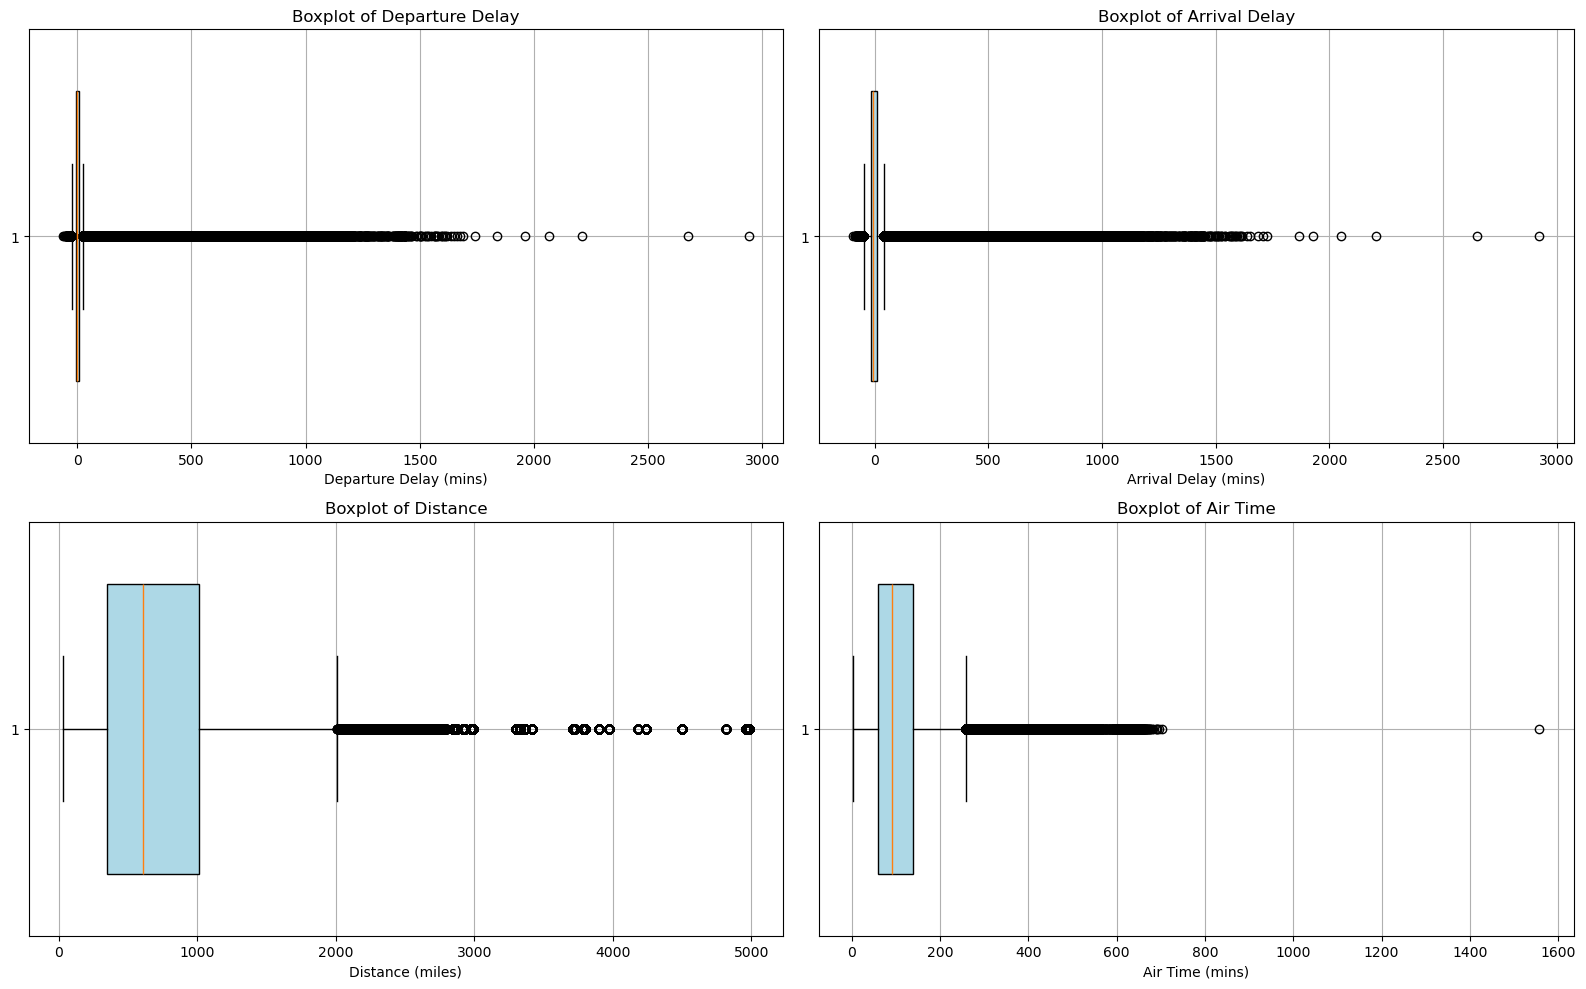

In [17]:
#Plotting boxplot to check the distribution
column1 = "DEP_DELAY"
column2 = "ARR_DELAY"
column3 = "DISTANCE"
column4 = "AIR_TIME"

# Create subplots for boxplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Common facecolor for all boxplots
boxprops = dict(facecolor='lightblue')

# Boxplot for column1 (DEP_DELAY)
ax1.boxplot(Flights_filtered_df[column1], vert=False, widths=0.7, patch_artist=True, boxprops=boxprops)
ax1.set_title("Boxplot of Departure Delay")
ax1.set_xlabel("Departure Delay (mins)")
ax1.grid(True)

# Boxplot for column2 (ARR_DELAY)
ax2.boxplot(Flights_filtered_df[column2], vert=False, widths=0.7, patch_artist=True, boxprops=boxprops)
ax2.set_title("Boxplot of Arrival Delay")
ax2.set_xlabel("Arrival Delay (mins)")
ax2.grid(True)

# Boxplot for column3 (DISTANCE)
ax3.boxplot(Flights_filtered_df[column3], vert=False, widths=0.7, patch_artist=True, boxprops=boxprops)
ax3.set_title("Boxplot of Distance")
ax3.set_xlabel("Distance (miles)")
ax3.grid(True)

# Boxplot for column4 (AIR_TIME)
ax4.boxplot(Flights_filtered_df[column4], vert=False, widths=0.7, patch_artist=True, boxprops=boxprops)
ax4.set_title("Boxplot of Air Time")
ax4.set_xlabel("Air Time (mins)")
ax4.grid(True)


plt.tight_layout()
plt.show()

It is evident that each of these four Box Plots **indicates a significant number of outliers** that require attention.

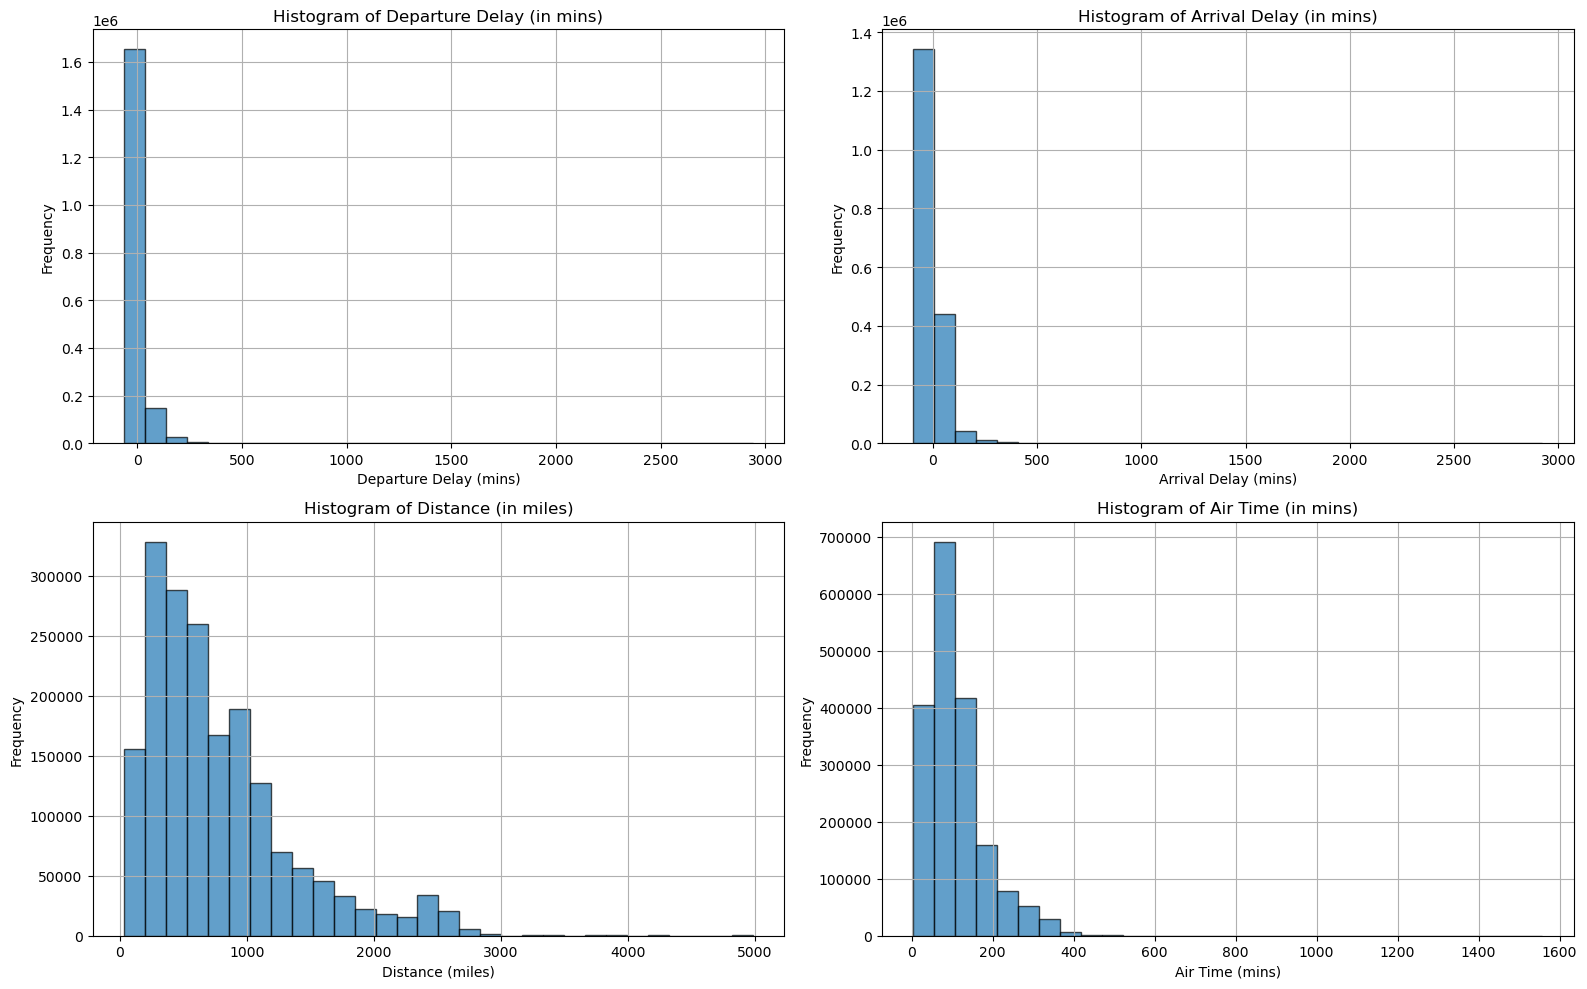

In [18]:
#Plotting Histogram to check the distribution
# Define the columns
column1 = "DEP_DELAY"
column2 = "ARR_DELAY"
column3 = "DISTANCE"
column4 = "AIR_TIME"

# Create subplots for histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Histogram for column1 (DEP_DELAY)
ax1.hist(Flights_filtered_df[column1], bins=30, edgecolor='black', alpha=0.7)
ax1.set_title("Histogram of Departure Delay (in mins)")
ax1.set_xlabel("Departure Delay (mins)")
ax1.set_ylabel("Frequency")
ax1.grid(True)

# Histogram for column2 (ARR_DELAY)
ax2.hist(Flights_filtered_df[column2], bins=30, edgecolor='black', alpha=0.7)
ax2.set_title("Histogram of Arrival Delay (in mins)")
ax2.set_xlabel("Arrival Delay (mins)")
ax2.set_ylabel("Frequency")
ax2.grid(True)

# Histogram for column3 (DISTANCE)
ax3.hist(Flights_filtered_df[column3], bins=30, edgecolor='black', alpha=0.7)
ax3.set_title("Histogram of Distance (in miles)")
ax3.set_xlabel("Distance (miles)")
ax3.set_ylabel("Frequency")
ax3.grid(True)

# Histogram for column4 (AIR_TIME)
ax4.hist(Flights_filtered_df[column4], bins=30, edgecolor='black', alpha=0.7)
ax4.set_title("Histogram of Air Time (in mins)")
ax4.set_xlabel("Air Time (mins)")
ax4.set_ylabel("Frequency")
ax4.grid(True)

plt.tight_layout()
plt.show()

The data appears to be **right skewed**, as indicated by the histogram, with the majority of values grouped towards the lower end of the range and a tail extending towards higher values. This indicates a distribution that **contains outliers or extremely high values** that needs treatment.

In [19]:
print('Number of rows = ', len(Flights_filtered_df))

Number of rows =  1840541


Creating a function `clean_percentile` removes extreme values from a dataset (quantileclean_df) based on specified percentiles (q1 and q2) of a column (col). It ensures the data analysis focuses on the central portion, **filtering out outliers** that might skew statistical insights or business decisions.

In [20]:
#Creating a function for cleaning the top and bottom n percentile of the data
def Clean_Percentile(quantileclean_df, col, q1, q2):
    q1 = quantileclean_df[col].quantile(q1)
    q2 = quantileclean_df[col].quantile(q2)
    quantileclean_df = quantileclean_df[(quantileclean_df[col] <= q2) & (quantileclean_df[col] >= q1)]
    return quantileclean_df

In [21]:
#From the destribution of arrival and depatrure delays, Airtime and Distance are right skewed, removing top and bottom 1 percentile as outliers.

Flights_filtered_df = Clean_Percentile(Flights_filtered_df, 'ARR_DELAY', 0.01, 0.99)
Flights_filtered_df = Clean_Percentile(Flights_filtered_df, 'DEP_DELAY', 0.01, 0.99)
Flights_filtered_df = Clean_Percentile(Flights_filtered_df, 'AIR_TIME', 0.01, 0.99)
Flights_filtered_df = Clean_Percentile(Flights_filtered_df, 'DISTANCE', 0.01, 0.99)


In [22]:
print('Number of rows = ', len(Flights_filtered_df))

Number of rows =  1709840


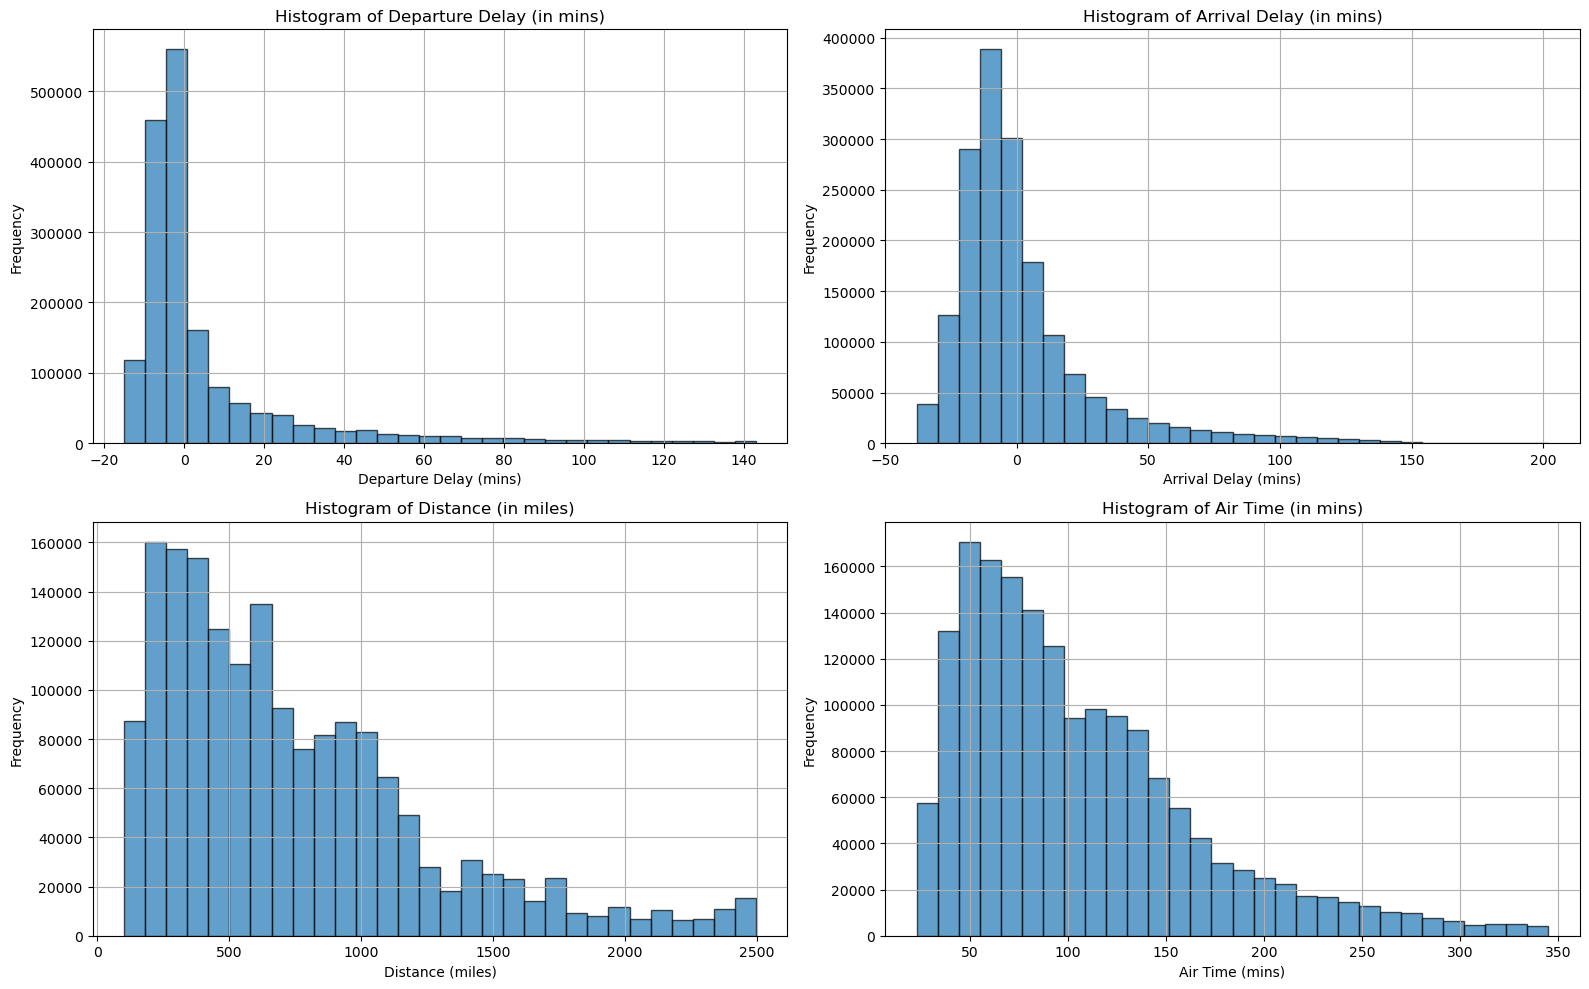

In [23]:
# Define the columns
column1 = "DEP_DELAY"
column2 = "ARR_DELAY"
column3 = "DISTANCE"
column4 = "AIR_TIME"
# Create subplots for histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Histogram for column1 (DEP_DELAY)
ax1.hist(Flights_filtered_df[column1], bins=30, edgecolor='black', alpha=0.7)
ax1.set_title("Histogram of Departure Delay (in mins)")
ax1.set_xlabel("Departure Delay (mins)")
ax1.set_ylabel("Frequency")
ax1.grid(True)

# Histogram for column2 (ARR_DELAY)
ax2.hist(Flights_filtered_df[column2], bins=30, edgecolor='black', alpha=0.7)
ax2.set_title("Histogram of Arrival Delay (in mins)")
ax2.set_xlabel("Arrival Delay (mins)")
ax2.set_ylabel("Frequency")
ax2.grid(True)

# Histogram for column3 (DISTANCE)
ax3.hist(Flights_filtered_df[column3], bins=30, edgecolor='black', alpha=0.7)
ax3.set_title("Histogram of Distance (in miles)")
ax3.set_xlabel("Distance (miles)")
ax3.set_ylabel("Frequency")
ax3.grid(True)

# Histogram for column4 (AIR_TIME)
ax4.hist(Flights_filtered_df[column4], bins=30, edgecolor='black', alpha=0.7)
ax4.set_title("Histogram of Air Time (in mins)")
ax4.set_xlabel("Air Time (mins)")
ax4.set_ylabel("Frequency")
ax4.grid(True)


plt.tight_layout()
plt.show()

In [24]:
Flights_filtered_df.describe()

FL_DATE    DEP_DELAY    ARR_DELAY     AIR_TIME  \
count                        1709840 1,709,840.00 1,709,840.00 1,709,840.00   
mean   2019-02-15 13:05:36.924156416         5.95         0.98       105.92   
min              2019-01-01 00:00:00       -15.00       -38.00        23.00   
25%              2019-01-24 00:00:00        -6.00       -15.00        60.00   
50%              2019-02-16 00:00:00        -2.00        -6.00        90.00   
75%              2019-03-11 00:00:00         6.00         7.00       136.00   
max              2019-03-31 00:00:00       143.00       202.00       345.00   
std                              NaN        23.63        27.48        61.31   

          DISTANCE  OCCUPANCY_RATE  
count 1,709,840.00    1,709,840.00  
mean        742.53            0.65  
min         102.00            0.30  
25%         356.00            0.48  
50%         607.00            0.65  
75%         991.00            0.82  
max       2,496.00            1.00  
std         507.13            0.20

In [25]:
Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-02         WN   N8686A              3231    RSW   Fort Myers, FL   
2 2019-03-02         WN   N201LV              3383    RSW   Fort Myers, FL   
3 2019-03-02         WN   N413WN              5498    RSW   Fort Myers, FL   
4 2019-03-02         WN   N7832A              6933    RSW   Fort Myers, FL   

  DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE  Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CMH   Columbus, OH       1.00       5.00    135.00    930.00   
2         CMH   Columbus, OH       0.00       4.00    132.00    930.00   
3         CMH   Columbus, OH      11.00      14.00    136.00    930.00   
4         DAL     Dallas, TX       0.00     -17.00    151.00  1,005.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE  
0            0.97  large_airport    large_airport  
1            0.55  large_airport    large_airport  
2            0.91  large_airport    large_airport  
3            0.67  large_airport    large_airport  
4            0.62  large_airport    large_airport

In [26]:
print('Number of rows in Flights Dataset (Flights_filtered_df) after Quality Checks and Data Munging = ', len(Flights_filtered_df))

Number of rows in Flights Dataset (Flights_filtered_df) after Quality Checks and Data Munging =  1709840


### b) Tickets.csv Data Cleaning

Cleaning of Tickets data ( `Tickets_df` dataframe ) to remove outliers and get a cleaner output for analysis.

In [27]:
#Reading Tickets data file
Tickets_df = pd.read_csv("data/Tickets.csv")
Tickets_df.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   
1  201912723085  2019        1    ABI             US               TX   
2  201912723491  2019        1    ABI             US               TX   
3  201912723428  2019        1    ABI             US               TX   
4  201912723509  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0           Texas       1.00                MQ        1.00     736.0   
1           Texas       1.00                MQ        1.00     570.0   
2           Texas       1.00                MQ        1.00     564.0   
3           Texas       1.00                MQ        1.00     345.0   
4           Texas       0.00                MQ        1.00     309.0   

  DESTINATION  
0         DAB  
1         COS  
2         MCO  
3         LGA  
4         MGM

In [28]:
# Using the function that we created (clean_numeric_column) to remove non-numeric characters
Tickets_df['ITIN_FARE'] = Tickets_df['ITIN_FARE'].apply(Clean_Numeric_Column)

In [29]:
# Checking for null values
Tickets_df.isnull().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64

In [30]:
# Quick Summary of the Tickets Dataset
Tickets_df.describe()

ITIN_ID         YEAR      QUARTER    ROUNDTRIP   PASSENGERS  \
count       1,167,285.00 1,167,285.00 1,167,285.00 1,167,285.00 1,165,308.00   
mean  171,560,218,178.93     2,019.00         1.00         0.61         2.07   
std    68,349,572,156.60         0.00         0.00         0.49         5.84   
min           201,912.00     2,019.00         1.00         0.00         1.00   
25%   201,911,466,844.00     2,019.00         1.00         0.00         1.00   
50%   201,912,800,912.00     2,019.00         1.00         1.00         1.00   
75%   201,913,965,014.00     2,019.00         1.00         1.00         1.00   
max   201,915,258,097.00     2,019.00         1.00         1.00       769.00   

         ITIN_FARE  
count 1,166,325.00  
mean        407.77  
std         776.62  
min           0.00  
25%         205.00  
50%         348.00  
75%         528.00  
max     377,400.00

In [31]:
# Merging Tickets_df with Airport_Codes_df to get ORIGIN_TYPE (Type of Takeoff Airport) and DESTINATION_TYPE (Type of Landing Airport) 
Tickets_df_with_origin_type = Lookup(Tickets_df, Airport_Codes_df, 'ORIGIN', 'IATA_CODE', 'TYPE', 'ORIGIN_TYPE')
Tickets_df_complete = Lookup(Tickets_df_with_origin_type, Airport_Codes_df, 'DESTINATION', 'IATA_CODE', 'TYPE', 'DESTINATION_TYPE')
Tickets_df_complete.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   
1  201912723085  2019        1    ABI             US               TX   
2  201912723491  2019        1    ABI             US               TX   
3  201912723428  2019        1    ABI             US               TX   
4  201912723509  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0           Texas       1.00                MQ        1.00     736.00   
1           Texas       1.00                MQ        1.00     570.00   
2           Texas       1.00                MQ        1.00     564.00   
3           Texas       1.00                MQ        1.00     345.00   
4           Texas       0.00                MQ        1.00     309.00   

  DESTINATION     ORIGIN_TYPE DESTINATION_TYPE  
0         DAB  medium_airport    large_airport  
1         COS  medium_airport    large_airport  
2         MCO  medium_airport    large_airport  
3         LGA  medium_airport    large_airport  
4         MGM  medium_airport    large_airport

In [32]:
print('Number of rows = ', len(Tickets_df_complete))

Number of rows =  1196918


This filter selects data for **round-trip flights between large and medium US airports in the first quarter of 2019**, ensuring that the **origin is in the United States** and that the number of **passengers and fare information are available**.

In [33]:
#Filtering based on the conditions in the Problem Statement
Tickets_filtered_df = Tickets_df_complete[(Tickets_df_complete['ORIGIN_TYPE'].isin(['large_airport', 'medium_airport'])) & 
                                (Tickets_df_complete['DESTINATION_TYPE'].isin(['large_airport', 'medium_airport'])) &
                                (Tickets_df_complete['ROUNDTRIP'] == 1) &
                                (Tickets_df_complete['ORIGIN_COUNTRY'] == 'US') &
                                (Tickets_df_complete['YEAR'] == 2019) &
                                (Tickets_df_complete['QUARTER'] == 1) &
                                (Tickets_df_complete['PASSENGERS'].notna()) & 
                                (Tickets_df_complete['ITIN_FARE'].notna())]
Tickets_filtered_df.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
10  201912723337  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0            Texas       1.00                MQ        1.00     736.00   
1            Texas       1.00                MQ        1.00     570.00   
2            Texas       1.00                MQ        1.00     564.00   
3            Texas       1.00                MQ        1.00     345.00   
10           Texas       1.00                MQ        1.00   1,647.00   

   DESTINATION     ORIGIN_TYPE DESTINATION_TYPE  
0          DAB  medium_airport    large_airport  
1          COS  medium_airport    large_airport  
2          MCO  medium_airport    large_airport  
3          LGA  medium_airport    large_airport  
10         JAX  medium_airport    large_airport

In [34]:
Tickets_filtered_df.isnull().sum()

ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
ORIGIN_TYPE          0
DESTINATION_TYPE     0
dtype: int64

We succesfully removed all null values and the filtered data has 694,398 rows

In [35]:
print('Number of rows = ', len(Tickets_filtered_df))

Number of rows =  694398


In [36]:
Tickets_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694398 entries, 0 to 1196917
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            694398 non-null  int64  
 1   YEAR               694398 non-null  int64  
 2   QUARTER            694398 non-null  int64  
 3   ORIGIN             694398 non-null  object 
 4   ORIGIN_COUNTRY     694398 non-null  object 
 5   ORIGIN_STATE_ABR   694398 non-null  object 
 6   ORIGIN_STATE_NM    694398 non-null  object 
 7   ROUNDTRIP          694398 non-null  float64
 8   REPORTING_CARRIER  694398 non-null  object 
 9   PASSENGERS         694398 non-null  float64
 10  ITIN_FARE          694398 non-null  float64
 11  DESTINATION        694398 non-null  object 
 12  ORIGIN_TYPE        694398 non-null  object 
 13  DESTINATION_TYPE   694398 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 79.5+ MB


Checking if the data contains any outliers

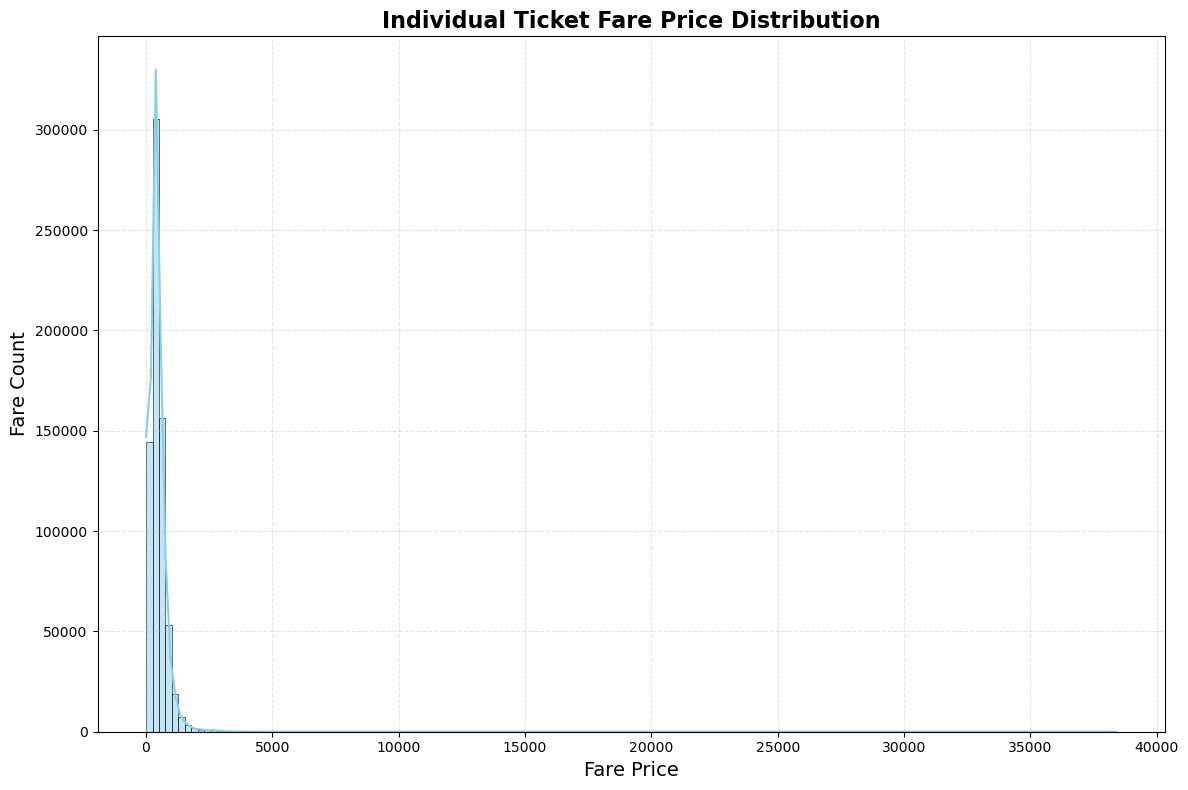

In [37]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the distribution of ITIN_FARE using a histogram with Seaborn
sns.histplot(Tickets_filtered_df['ITIN_FARE'], kde=True, color='skyblue', bins=150)

# Set the title and labels with better font properties
plt.title('Individual Ticket Fare Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fare Price', fontsize=14)
plt.ylabel('Fare Count', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Apply a tight layout to ensure no clipping of labels/titles
plt.tight_layout()

# Show the plot
plt.show()

We can see that the above distribution has outliers. By cleaning using `clean_percentile` function on `Tickets_filtered_df` dataframe that is filtered and removing the top and bottom 1% of the data as outliers we get following output:

In [38]:
Tickets_filtered_df = Clean_Percentile(Tickets_filtered_df, 'ITIN_FARE', 0.01, 0.99)

Plotting the new distribution of `Tickets_filtered_df` on **ITIN_FARE** after cleaning the outliers

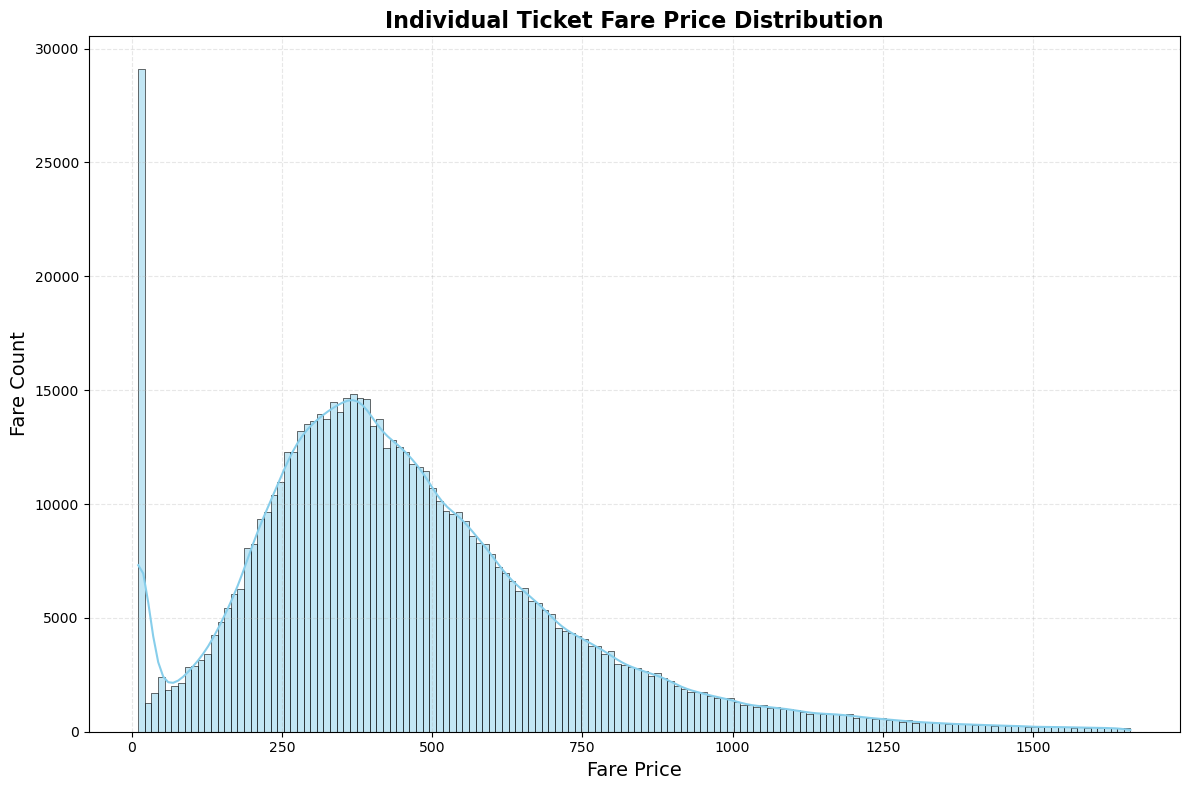

In [39]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the distribution of ITIN_FARE using a histogram with Seaborn
sns.histplot(Tickets_filtered_df['ITIN_FARE'], kde=True, color='skyblue', bins=150)

# Set the title and labels with better font properties
plt.title('Individual Ticket Fare Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fare Price', fontsize=14)
plt.ylabel('Fare Count', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Apply a tight layout to ensure no clipping of labels/titles
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# Count the number of data points where the ITIN_FARE column has a value of 11
num_of_11s = Tickets_filtered_df[Tickets_filtered_df['ITIN_FARE'] == 11].shape[0]
print("Number of data points with ITIN_FARE value 11:", num_of_11s)

Number of data points with ITIN_FARE value 11: 28771


The distribution is improved, however there are 28,771 Tickets with Fare 11 USD with diverse flight paths that need to be examined further.

In [41]:
# Quick Summary of the Cleaned and Filtered Tickets Dataset
Tickets_filtered_df.describe()

ITIN_ID       YEAR    QUARTER  ROUNDTRIP  PASSENGERS  \
count         681,160.00 681,160.00 681,160.00 681,160.00  681,160.00   
mean  172,803,194,292.40   2,019.00       1.00       1.00        1.94   
std    67,297,525,423.51       0.00       0.00       0.00        4.99   
min         2,019,119.00   2,019.00       1.00       1.00        1.00   
25%   201,911,562,093.75   2,019.00       1.00       1.00        1.00   
50%   201,912,831,171.00   2,019.00       1.00       1.00        1.00   
75%   201,914,036,268.75   2,019.00       1.00       1.00        1.00   
max   201,915,258,097.00   2,019.00       1.00       1.00      681.00   

       ITIN_FARE  
count 681,160.00  
mean      460.13  
std       270.95  
min        11.00  
25%       283.00  
50%       416.00  
75%       592.00  
max     1,662.00

In [42]:
print('Number of rows in Tickets Dataset (Tickets_filtered_df) after Quality Checks and Data Munging = ', len(Tickets_filtered_df))

Number of rows in Tickets Dataset (Tickets_filtered_df) after Quality Checks and Data Munging =  681160


## ii) Data Analysis and Data Visualization

#### Q1 You have been tasked with analyzing 1Q2019 data to identify:
- 1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter. 
Exclude canceled flights when performing the calculation.

In [43]:
# Creating a function to get the sorted round trip flight path as a string
def Round_Trip(df, ORIGIN, DESTINATION):
    df['Flight_Path'] = df[[ORIGIN, DESTINATION]].apply(tuple, axis = 1)
    df['Flight_Path'] = df['Flight_Path'].apply(sorted)
    df['Flight_Path'] = df['Flight_Path'].str[0] + '_' + df['Flight_Path'].str[1]
    return df['Flight_Path']

Flights_filtered_df['Flight_Path'] = Round_Trip(Flights_filtered_df, 'ORIGIN', 'DESTINATION')
Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-02         WN   N8686A              3231    RSW   Fort Myers, FL   
2 2019-03-02         WN   N201LV              3383    RSW   Fort Myers, FL   
3 2019-03-02         WN   N413WN              5498    RSW   Fort Myers, FL   
4 2019-03-02         WN   N7832A              6933    RSW   Fort Myers, FL   

  DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE  Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CMH   Columbus, OH       1.00       5.00    135.00    930.00   
2         CMH   Columbus, OH       0.00       4.00    132.00    930.00   
3         CMH   Columbus, OH      11.00      14.00    136.00    930.00   
4         DAL     Dallas, TX       0.00     -17.00    151.00  1,005.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE Flight_Path  
0            0.97  large_airport    large_airport     CLE_RSW  
1            0.55  large_airport    large_airport     CMH_RSW  
2            0.91  large_airport    large_airport     CMH_RSW  
3            0.67  large_airport    large_airport     CMH_RSW  
4            0.62  large_airport    large_airport     DAL_RSW

In [44]:
Flights_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709840 entries, 0 to 1941505
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN             object        
 5   ORIGIN_CITY_NAME   object        
 6   DESTINATION        object        
 7   DEST_CITY_NAME     object        
 8   DEP_DELAY          float64       
 9   ARR_DELAY          float64       
 10  AIR_TIME           float64       
 11  DISTANCE           float64       
 12  OCCUPANCY_RATE     float64       
 13  ORIGIN_TYPE        object        
 14  DESTINATION_TYPE   object        
 15  Flight_Path        object        
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 221.8+ MB


In [45]:
print('Number of rows = ', len(Flights_filtered_df))

Number of rows =  1709840


In [46]:
# creating a function that finds and ranks the busiest cities based on the number of occurrences in the specified column of a DataFrame.
def Find_Busiest_Cities(df, city_column):
    if city_column not in df.columns:
        raise ValueError(f"Column {city_column} not found in DataFrame")

    busiest_cities_df = df.groupby(by=city_column).size().reset_index(name='Count_of_occurance').sort_values(
        'Count_of_occurance', ascending=False).reset_index(drop=True)

    return busiest_cities_df

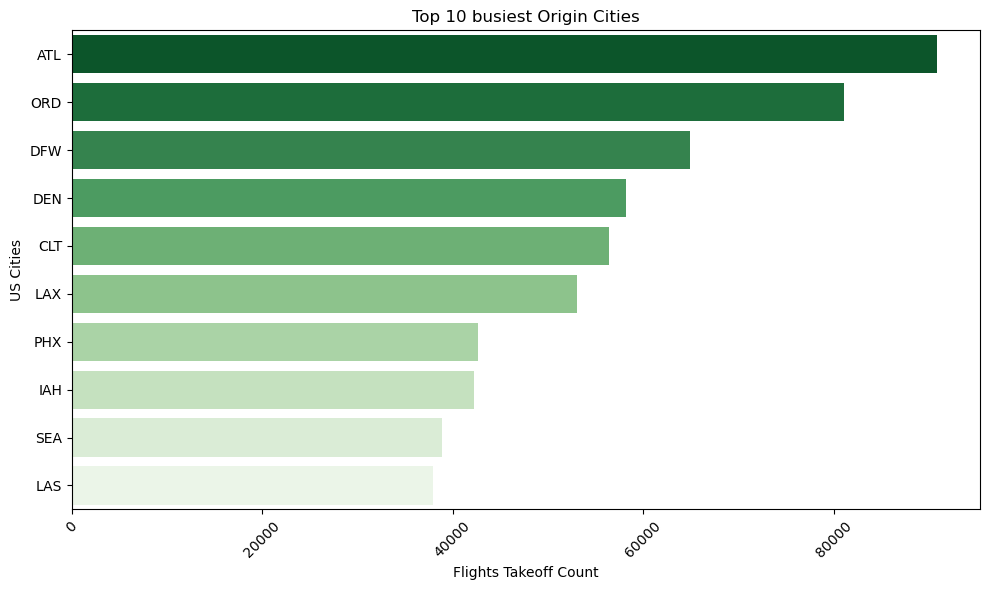

In [47]:
#Plotting top 10 Busiest Origin Cities
Busiest_ORIGIN_Cities_df = Find_Busiest_Cities(Flights_filtered_df, 'ORIGIN')
plt.figure(figsize=(10, 6))
sns.barplot(y=Busiest_ORIGIN_Cities_df['ORIGIN'].head(10),
            x=Busiest_ORIGIN_Cities_df['Count_of_occurance'].head(10),
            palette='Greens_r').set(title='Top 10 busiest Origin Cities')
plt.xticks(rotation=45)
plt.ylabel('US Cities')
plt.xlabel('Flights Takeoff Count')
plt.tight_layout()
plt.show()

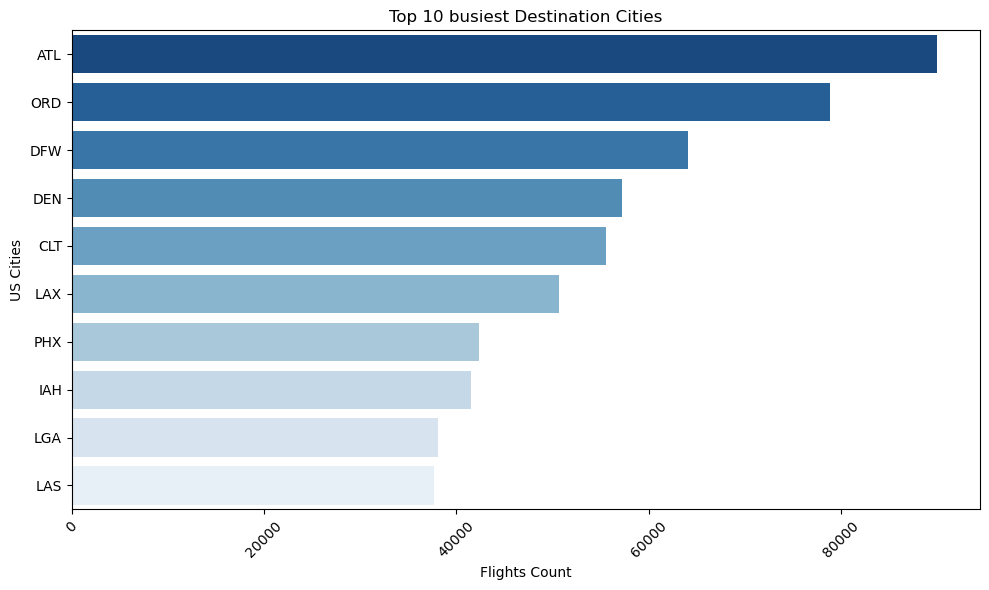

In [48]:
#Plotting top 10 Busiest Destination Cities
Busiest_DEST_Cities_df = Find_Busiest_Cities(Flights_filtered_df, 'DESTINATION')
plt.figure(figsize=(10, 6))
sns.barplot(y=Busiest_DEST_Cities_df['DESTINATION'].head(10),
            x=Busiest_DEST_Cities_df['Count_of_occurance'].head(10),
            palette='Blues_r').set(title='Top 10 busiest Destination Cities')
plt.xticks(rotation=45)
plt.ylabel('US Cities')
plt.xlabel('Flights Count')
plt.tight_layout()
plt.show()

In [49]:
# Create the PASSENGERS_OCCUPIED column
Flights_filtered_df['PASSENGERS_OCCUPIED'] = Flights_filtered_df['OCCUPANCY_RATE'] * 200

# Create a DataFrame to count round trips and sum passengers occupied
round_trip_stats = Flights_filtered_df.groupby(['Flight_Path', 'TAIL_NUM']).agg(
    Flight_Count=('TAIL_NUM', 'size'),
    Total_Passengers_Occupied=('PASSENGERS_OCCUPIED', 'sum')
).reset_index()

# Filter for round trips (pairs of flights)
round_trip_stats = round_trip_stats[round_trip_stats['Flight_Count'] >= 2]

# Sum the round trips (each round trip has 2 flights)
round_trip_stats['Round_Trip_Count'] = round_trip_stats['Flight_Count'] // 2

# Group by Round_Trip_Path to get the total round trips and passengers occupied across all TAIL_NUMs
round_trip_summary = round_trip_stats.groupby('Flight_Path').agg(
    Total_Round_Trips=('Round_Trip_Count', 'sum'),
    Total_Passengers_Occupied=('Total_Passengers_Occupied', 'sum')
).reset_index()

# Sort to find the 10 busiest round trip routes
top_10_round_trips = round_trip_summary.sort_values(by='Total_Round_Trips', ascending=False)

In [50]:
Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-02         WN   N8686A              3231    RSW   Fort Myers, FL   
2 2019-03-02         WN   N201LV              3383    RSW   Fort Myers, FL   
3 2019-03-02         WN   N413WN              5498    RSW   Fort Myers, FL   
4 2019-03-02         WN   N7832A              6933    RSW   Fort Myers, FL   

  DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE  Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CMH   Columbus, OH       1.00       5.00    135.00    930.00   
2         CMH   Columbus, OH       0.00       4.00    132.00    930.00   
3         CMH   Columbus, OH      11.00      14.00    136.00    930.00   
4         DAL     Dallas, TX       0.00     -17.00    151.00  1,005.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE Flight_Path  \
0            0.97  large_airport    large_airport     CLE_RSW   
1            0.55  large_airport    large_airport     CMH_RSW   
2            0.91  large_airport    large_airport     CMH_RSW   
3            0.67  large_airport    large_airport     CMH_RSW   
4            0.62  large_airport    large_airport     DAL_RSW   

   PASSENGERS_OCCUPIED  
0               194.00  
1               110.00  
2               182.00  
3               134.00  
4               124.00

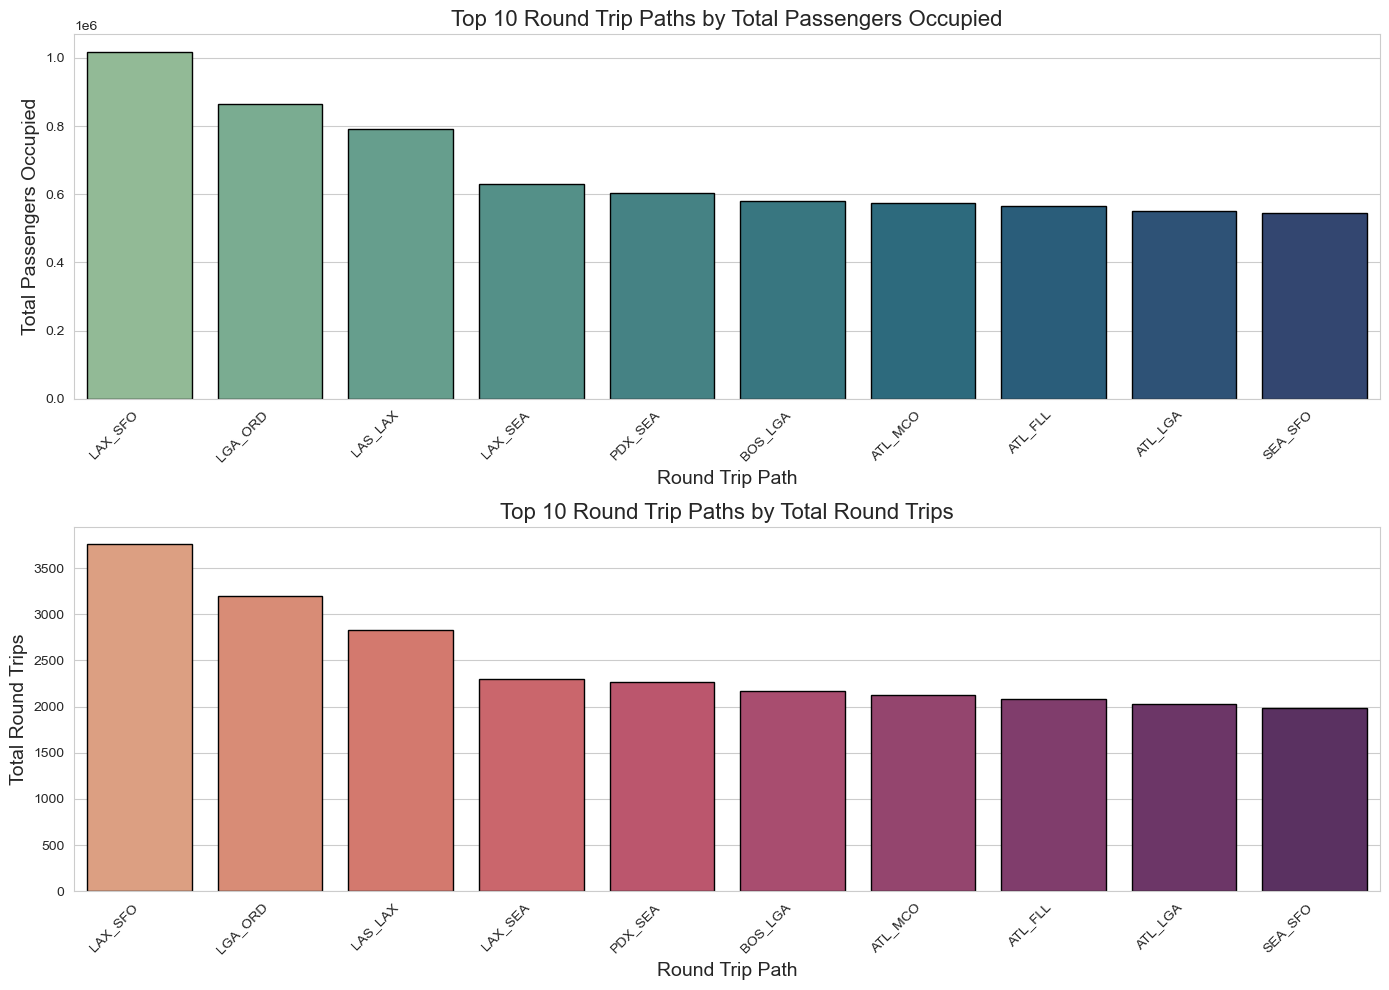

In [51]:
# Sort to find the top 10 paths by Total Passengers Occupied
top_10_passengers = top_10_round_trips.sort_values(by='Total_Passengers_Occupied', ascending=False).head(10)

# Sort to find the top 10 paths by Total Round Trips
top_10_round_trips = top_10_round_trips.sort_values(by='Total_Round_Trips', ascending=False).head(10)

# Plotting two separate bar graphs

# Plot for Top 10 Paths by Total Passengers Occupied
plt.figure(figsize=(14, 10))  # Increased figure height for better spacing
sns.set_style("whitegrid")

ax1 = plt.subplot(211)
bars1 = sns.barplot(data=top_10_passengers, x='Flight_Path', y='Total_Passengers_Occupied', palette='crest', ax=ax1)

# Add borders to bars in the first subplot
for bar in bars1.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

ax1.set_title('Top 10 Round Trip Paths by Total Passengers Occupied', fontsize=16)
ax1.set_xlabel('Round Trip Path', fontsize=14)
ax1.set_ylabel('Total Passengers Occupied', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot for Top 10 Paths by Total Round Trips
ax2 = plt.subplot(212)
bars2 = sns.barplot(data=top_10_round_trips, x='Flight_Path', y='Total_Round_Trips', palette='flare', ax=ax2)

# Add borders to bars in the second subplot
for bar in bars2.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

ax2.set_title('Top 10 Round Trip Paths by Total Round Trips', fontsize=16)
ax2.set_xlabel('Round Trip Path', fontsize=14)
ax2.set_ylabel('Total Round Trips', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [52]:
top_10_round_trips.head(10)

Flight_Path  Total_Round_Trips  Total_Passengers_Occupied
2077     LAX_SFO               3758               1,018,254.00
2118     LGA_ORD               3202                 866,108.00
1985     LAS_LAX               2829                 791,502.00
2076     LAX_SEA               2296                 629,440.00
2515     PDX_SEA               2266                 603,760.00
525      BOS_LGA               2170                 581,536.00
178      ATL_MCO               2121                 574,294.00
146      ATL_FLL               2085                 565,112.00
174      ATL_LGA               2031                 551,090.00
2672     SEA_SFO               1987                 545,578.00

The ten busiest round trip routes in terms of the number of round trip flights in the quarter:
- 1. Los Angeles, CA (LAX) - San Francisco, CA (SFO)
- 2. New York, NY (LGA) - Chicago, IL (ORD)
- 3. Las Vegas, NV (LAS) - Los Angeles, CA (LAX)
- 4. Los Angeles, CA (LAX) - Seattle, WA (SEA)
- 5. Portland, OR (PDX) - Seattle, WA (SEA)
- 6. Boston, MA (BOS) - New York, NY (LGA)
- 7. Atlanta, GA (ATL) - Orlando, FL (MCO)
- 8. Atlanta, GA (ATL) - Fort Lauderdale, FL (FLL)
- 9. Atlanta, GA (ATL) - New York, NY (LGA)
- 10. Seattle, WA (SEA) - San Francisco, CA (SFO)

## ii) Q2

#### You have been tasked with analyzing 1Q2019 data to identify:
- 2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in 
the quarter. Along with the profit, show total revenue, total cost, summary values o 
other key components and total round trip flights in the quarter for the top 10 mo t
profitable routes. Exclude canceled flights from these calculations.

In [54]:
Tickets_filtered_df['Flight_Path'] = Round_Trip(Tickets_filtered_df, 'ORIGIN', 'DESTINATION')
Tickets_filtered_df.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
10  201912723337  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0            Texas       1.00                MQ        1.00     736.00   
1            Texas       1.00                MQ        1.00     570.00   
2            Texas       1.00                MQ        1.00     564.00   
3            Texas       1.00                MQ        1.00     345.00   
10           Texas       1.00                MQ        1.00   1,647.00   

   DESTINATION     ORIGIN_TYPE DESTINATION_TYPE Flight_Path  
0          DAB  medium_airport    large_airport     ABI_DAB  
1          COS  medium_airport    large_airport     ABI_COS  
2          MCO  medium_airport    large_airport     ABI_MCO  
3          LGA  medium_airport    large_airport     ABI_LGA  
10         JAX  medium_airport    large_airport     ABI_JAX

In [55]:
Tickets_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681160 entries, 0 to 1196917
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            681160 non-null  int64  
 1   YEAR               681160 non-null  int64  
 2   QUARTER            681160 non-null  int64  
 3   ORIGIN             681160 non-null  object 
 4   ORIGIN_COUNTRY     681160 non-null  object 
 5   ORIGIN_STATE_ABR   681160 non-null  object 
 6   ORIGIN_STATE_NM    681160 non-null  object 
 7   ROUNDTRIP          681160 non-null  float64
 8   REPORTING_CARRIER  681160 non-null  object 
 9   PASSENGERS         681160 non-null  float64
 10  ITIN_FARE          681160 non-null  float64
 11  DESTINATION        681160 non-null  object 
 12  ORIGIN_TYPE        681160 non-null  object 
 13  DESTINATION_TYPE   681160 non-null  object 
 14  Flight_Path        681160 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 83.1+ 

In [56]:
# Calculate the average ticket price for each Flight_Path
avg_ticket_price_df = Tickets_filtered_df.groupby('Flight_Path').agg(
    Avg_Ticket_Price=('ITIN_FARE', 'mean')
).reset_index()
avg_ticket_price_df.head()

Flight_Path  Avg_Ticket_Price
0     ABE_ABI            758.00
1     ABE_ABQ            534.00
2     ABE_AGS            391.00
3     ABE_AMA            654.00
4     ABE_ASE            742.00

In [57]:
#Reviewing Flights_filtered_df to merge the dataframe with average ticket prices (avg_ticket_price_df)
Flights_filtered_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-02         WN   N8686A              3231    RSW   Fort Myers, FL   
2 2019-03-02         WN   N201LV              3383    RSW   Fort Myers, FL   
3 2019-03-02         WN   N413WN              5498    RSW   Fort Myers, FL   
4 2019-03-02         WN   N7832A              6933    RSW   Fort Myers, FL   

  DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE  Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CMH   Columbus, OH       1.00       5.00    135.00    930.00   
2         CMH   Columbus, OH       0.00       4.00    132.00    930.00   
3         CMH   Columbus, OH      11.00      14.00    136.00    930.00   
4         DAL     Dallas, TX       0.00     -17.00    151.00  1,005.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE Flight_Path  \
0            0.97  large_airport    large_airport     CLE_RSW   
1            0.55  large_airport    large_airport     CMH_RSW   
2            0.91  large_airport    large_airport     CMH_RSW   
3            0.67  large_airport    large_airport     CMH_RSW   
4            0.62  large_airport    large_airport     DAL_RSW   

   PASSENGERS_OCCUPIED  
0               194.00  
1               110.00  
2               182.00  
3               134.00  
4               124.00

In [58]:
#Joining Average Ticket price of the flights to the cleaned Flights_filtered_df
Flights_Merged_df = Flights_filtered_df.merge(
    right=avg_ticket_price_df,         # The DataFrame with average ticket prices
    left_on='Flight_Path',             # The column in Flights_filtered_df to join on
    right_on='Flight_Path',            # The column in avg_ticket_price_df to join on
    how='inner'                        # Only include rows with matching Flight_Path values
)
Flights_Merged_df.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  \
0 2019-03-02         WN   N955WN              4591    RSW   Fort Myers, FL   
1 2019-03-09         WN   N754SW              3016    RSW   Fort Myers, FL   
2 2019-03-24         UA   N14249              2267    CLE    Cleveland, OH   
3 2019-03-11         UA   N14240              2350    RSW   Fort Myers, FL   
4 2019-03-11         UA   N14240              2267    CLE    Cleveland, OH   

  DESTINATION  DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE  \
0         CLE   Cleveland, OH      -8.00      -6.00    143.00  1,025.00   
1         CLE   Cleveland, OH      -7.00     -22.00    137.00  1,025.00   
2         RSW  Fort Myers, FL     -10.00     -23.00    136.00  1,025.00   
3         CLE   Cleveland, OH      -1.00       8.00    138.00  1,025.00   
4         RSW  Fort Myers, FL      -4.00     -23.00    130.00  1,025.00   

   OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE Flight_Path  \
0            0.97  large_airport    large_airport     CLE_RSW   
1            0.63  large_airport    large_airport     CLE_RSW   
2            0.76  large_airport    large_airport     CLE_RSW   
3            0.36  large_airport    large_airport     CLE_RSW   
4            0.66  large_airport    large_airport     CLE_RSW   

   PASSENGERS_OCCUPIED  Avg_Ticket_Price  
0               194.00            289.26  
1               126.00            289.26  
2               152.00            289.26  
3                72.00            289.26  
4               132.00            289.26

In [59]:
#Creating a Profit Calculation Dataframe to add new metrices and remove unwanted columns from the Merged Flights dataframe - Flights_Merged_df 
Flights_PnL_df = Flights_Merged_df.drop(columns=['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME'])
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE DESTINATION_TYPE Flight_Path  \
0  1,025.00            0.97  large_airport    large_airport     CLE_RSW   
1  1,025.00            0.63  large_airport    large_airport     CLE_RSW   
2  1,025.00            0.76  large_airport    large_airport     CLE_RSW   
3  1,025.00            0.36  large_airport    large_airport     CLE_RSW   
4  1,025.00            0.66  large_airport    large_airport     CLE_RSW   

   PASSENGERS_OCCUPIED  Avg_Ticket_Price  
0               194.00            289.26  
1               126.00            289.26  
2               152.00            289.26  
3                72.00            289.26  
4               132.00            289.26

As per **Cost Assumptions** from the problem statement:
- Fuel, Oil, Maintenance, Crew: **\$8** per mile total, Depreciation, Insurance, Other: **\$1.18** per mile total. Used to calculate `Mileage_Cost`.
- Airport operational costs for the right to use the airports and related services are fixed at **\$5,000** for medium airports and **\$10,000** for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges. Used to calculate `Airport_Cost`.
- For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline **\$75** in added operational costs. Used to calculate `Dep_Delay_Cost`.
- For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline **\$75** in added operational costs. Used to calculate `Arr_Delay_Cost`.

In [60]:
# Defining cost rates from the problem statement
fuel_maintenance_cost_per_mile = 8
depreciation_insurance_cost_per_mile = 1.18
medium_airport_cost = 5000
large_airport_cost = 10000
delay_cost_per_minute = 75

# Calculating mileage costs
Flights_PnL_df['Mileage_Cost'] = Flights_Merged_df['DISTANCE'] * (fuel_maintenance_cost_per_mile + depreciation_insurance_cost_per_mile)

# Calculating airport costs
Flights_PnL_df['Airport_Cost'] = Flights_Merged_df.apply(lambda row: (medium_airport_cost if row['ORIGIN_TYPE'] == 'medium_airport' else large_airport_cost) +
                                                            (medium_airport_cost if row['DESTINATION_TYPE'] == 'medium_airport' else large_airport_cost), axis=1)

# Calculating delay costs
Flights_PnL_df['Dep_Delay_Cost'] = Flights_Merged_df['DEP_DELAY'].apply(lambda x: max(0, x - 15) * delay_cost_per_minute)
Flights_PnL_df['Arr_Delay_Cost'] = Flights_Merged_df['ARR_DELAY'].apply(lambda x: max(0, x - 15) * delay_cost_per_minute)
Flights_PnL_df['Total_Delay_Cost'] = Flights_PnL_df['Dep_Delay_Cost'] + Flights_PnL_df['Arr_Delay_Cost']

# Calculating delay costs
Flights_PnL_df['Dep_Delay_Cost'] = Flights_Merged_df['DEP_DELAY'].apply(lambda x: max(0, x - 15) * delay_cost_per_minute if x > 0 else 0)
Flights_PnL_df['Arr_Delay_Cost'] = Flights_Merged_df['ARR_DELAY'].apply(lambda x: max(0, x - 15) * delay_cost_per_minute if x > 0 else 0)
Flights_PnL_df['Total_Delay_Cost'] = Flights_PnL_df['Dep_Delay_Cost'] + Flights_PnL_df['Arr_Delay_Cost']


# Calculating total costs
Flights_PnL_df['Total_Cost'] = Flights_PnL_df['Mileage_Cost'] + Flights_PnL_df['Airport_Cost'] + Flights_PnL_df['Total_Delay_Cost']

As per **Revenue Assumptions** from the problem statement:
- 1. Each plane can accommodate up to 200 passengers, and each flight has an associated occupancy rate provided in the Flights data set. Do not use the Tickets data set to determine occupancy. Condition used to calculate the metric `Ticket_Revenue`
- 2. Baggage fee is **\$35** for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of **\$70** in baggage fees for a round trip flight. Used to measure the metric `Baggage_Fee_Revenue`.
- 3. Disregard seasonal effects on ticket prices (i.e., ticket prices are the same in April as they are on Memorial Day or in December).


In [61]:
# Calculating Ticket revenue = product of Occupancy Rate, Maximum Occupancy (200) and Average Ticket Price - From Revenue Assumption 1.
Flights_PnL_df['Ticket_Revenue'] = Flights_PnL_df['OCCUPANCY_RATE'] * 200 * Flights_PnL_df['Avg_Ticket_Price']
# Calculating Baggage Fee Revenue = product of Occupancy Rate, Maximum Occupancy, 50%, and $70 for roundtrips ($35 * 2) - From Revenue Assumption 2.
Flights_PnL_df['Baggage_Fee_Revenue'] = Flights_PnL_df['OCCUPANCY_RATE'] * 200 * 0.5 * 70
#Calculating Total Revenue as a sum of Ticket revenue and Baggage Fee Revenue
Flights_PnL_df['Total_Revenue'] = Flights_PnL_df['Ticket_Revenue'] + Flights_PnL_df['Baggage_Fee_Revenue']

In [62]:
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  ... Avg_Ticket_Price Mileage_Cost  \
0  1,025.00            0.97  large_airport  ...           289.26     9,409.50   
1  1,025.00            0.63  large_airport  ...           289.26     9,409.50   
2  1,025.00            0.76  large_airport  ...           289.26     9,409.50   
3  1,025.00            0.36  large_airport  ...           289.26     9,409.50   
4  1,025.00            0.66  large_airport  ...           289.26     9,409.50   

   Airport_Cost  Dep_Delay_Cost  Arr_Delay_Cost  Total_Delay_Cost  Total_Cost  \
0         20000            0.00            0.00              0.00   29,409.50   
1         20000            0.00            0.00              0.00   29,409.50   
2         20000            0.00            0.00              0.00   29,409.50   
3         20000            0.00            0.00              0.00   29,409.50   
4         20000            0.00            0.00              0.00   29,409.50   

   Ticket_Revenue  Baggage_Fee_Revenue  Total_Revenue  
0       56,116.01             6,790.00      62,906.01  
1       36,446.48             4,410.00      40,856.48  
2       43,967.18             5,320.00      49,287.18  
3       20,826.56             2,520.00      23,346.56  
4       38,182.02             4,620.00      42,802.02  

[5 rows x 23 columns]

### Defining KPI
- `Profit` is the difference between `Total_Revenue` (the overall income generated from flight operations) and `Total_Cost` (the total **variable expenses** incurred), indicating the financial gain or loss from airline operations after covering all costs. This metric is essential for assessing the financial performance and profitability of each flight route.

In [63]:
# Calculating Profit = Revenue - Cost
Flights_PnL_df['Profit'] = Flights_PnL_df['Total_Revenue'] - Flights_PnL_df['Total_Cost']

In [64]:
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  ... Mileage_Cost Airport_Cost  \
0  1,025.00            0.97  large_airport  ...     9,409.50        20000   
1  1,025.00            0.63  large_airport  ...     9,409.50        20000   
2  1,025.00            0.76  large_airport  ...     9,409.50        20000   
3  1,025.00            0.36  large_airport  ...     9,409.50        20000   
4  1,025.00            0.66  large_airport  ...     9,409.50        20000   

   Dep_Delay_Cost  Arr_Delay_Cost  Total_Delay_Cost  Total_Cost  \
0            0.00            0.00              0.00   29,409.50   
1            0.00            0.00              0.00   29,409.50   
2            0.00            0.00              0.00   29,409.50   
3            0.00            0.00              0.00   29,409.50   
4            0.00            0.00              0.00   29,409.50   

   Ticket_Revenue  Baggage_Fee_Revenue  Total_Revenue    Profit  
0       56,116.01             6,790.00      62,906.01 33,496.51  
1       36,446.48             4,410.00      40,856.48 11,446.98  
2       43,967.18             5,320.00      49,287.18 19,877.68  
3       20,826.56             2,520.00      23,346.56 -6,062.94  
4       38,182.02             4,620.00      42,802.02 13,392.52  

[5 rows x 24 columns]

### Defining KPI:
- `Average_Daily_Flights` : This represents the average number of flights operated daily on each route. This metric helps in understanding the frequency of flights per route, aiding in capacity planning and operational efficiency.

In [65]:
# Group by Flight_Path, TAIL_NUM, and FL_DATE, then count daily flights
daily_flights = Flights_PnL_df.groupby(['Flight_Path', 'TAIL_NUM', 'FL_DATE']).size().reset_index(name='Daily_Flights')

# Calculate Average Daily Flights per TAIL_NUM for each Flight_Path
avg_daily_flights_per_tailnum = daily_flights.groupby(['Flight_Path', 'TAIL_NUM'])['Daily_Flights'].mean().reset_index()

# Calculate Average Daily Flights (ADF) per Flight_Path by taking the overall average across all TAIL_NUM
ADF_by_Flight_Path = avg_daily_flights_per_tailnum.groupby('Flight_Path')['Daily_Flights'].mean().reset_index()
ADF_by_Flight_Path.rename(columns={'Daily_Flights': 'Average_Daily_Flights'}, inplace=True)

# Merge ADF_by_Flight_Path back into Flights_PnL_Filtered_df
Flights_PnL_df = pd.merge(Flights_PnL_df, ADF_by_Flight_Path, on='Flight_Path', how='left')

# Display the result
Flights_PnL_df

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  \
0       2019-03-02   N955WN    RSW         CLE      -8.00      -6.00   
1       2019-03-09   N754SW    RSW         CLE      -7.00     -22.00   
2       2019-03-24   N14249    CLE         RSW     -10.00     -23.00   
3       2019-03-11   N14240    RSW         CLE      -1.00       8.00   
4       2019-03-11   N14240    CLE         RSW      -4.00     -23.00   
...            ...      ...    ...         ...        ...        ...   
1708013 2019-01-05   N817UA    MTJ         LGA      35.00       8.00   
1708014 2019-01-05   N16701    STT         IAH      -6.00     -33.00   
1708015 2019-01-05   N16701    IAH         STT      -3.00       7.00   
1708016 2019-01-08   N805NN    SJC         BHM      -5.00     -35.00   
1708017 2019-01-05   N817NN    BHM         SJC       5.00      30.00   

         AIR_TIME  DISTANCE  OCCUPANCY_RATE     ORIGIN_TYPE  ... Airport_Cost  \
0          143.00  1,025.00            0.97   large_airport  ...        20000   
1          137.00  1,025.00            0.63   large_airport  ...        20000   
2          136.00  1,025.00            0.76   large_airport  ...        20000   
3          138.00  1,025.00            0.36   large_airport  ...        20000   
4          130.00  1,025.00            0.66   large_airport  ...        20000   
...           ...       ...             ...             ...  ...          ...   
1708013    196.00  1,810.00            0.45  medium_airport  ...        15000   
1708014    274.00  2,070.00            0.86  medium_airport  ...        15000   
1708015    245.00  2,070.00            0.90   large_airport  ...        15000   
1708016    224.00  1,990.00            0.63   large_airport  ...        20000   
1708017    301.00  1,990.00            0.97   large_airport  ...        20000   

        Dep_Delay_Cost  Arr_Delay_Cost  Total_Delay_Cost  Total_Cost  \
0                 0.00            0.00              0.00   29,409.50   
1                 0.00            0.00              0.00   29,409.50   
2                 0.00            0.00              0.00   29,409.50   
3                 0.00            0.00              0.00   29,409.50   
4                 0.00            0.00              0.00   29,409.50   
...                ...             ...               ...         ...   
1708013       1,500.00            0.00          1,500.00   33,115.80   
1708014           0.00            0.00              0.00   34,002.60   
1708015           0.00            0.00              0.00   34,002.60   
1708016           0.00            0.00              0.00   38,268.20   
1708017           0.00        1,125.00          1,125.00   39,393.20   

         Ticket_Revenue  Baggage_Fee_Revenue  Total_Revenue     Profit  \
0             56,116.01             6,790.00      62,906.01  33,496.51   
1             36,446.48             4,410.00      40,856.48  11,446.98   
2             43,967.18             5,320.00      49,287.18  19,877.68   
3             20,826.56             2,520.00      23,346.56  -6,062.94   
4             38,182.02             4,620.00      42,802.02  13,392.52   
...                 ...                  ...            ...        ...   
1708013       56,482.50             3,150.00      59,632.50  26,516.70   
1708014      144,181.87             6,020.00     150,201.87 116,199.27   
1708015      150,888.00             6,300.00     157,188.00 123,185.40   
1708016       77,504.00             4,410.00      81,914.00  43,645.80   
1708017      119,331.56             6,790.00     126,121.56  86,728.36   

         Average_Daily_Flights  
0                         1.37  
1                         1.37  
2                         1.37  
3                         1.37  
4                         1.37  
...                        ...  
1708013                   2.00  
1708014                   2.00  
1708015                   2.00  
1708016                   1.00  
1708017                   1.00  

[1708018 rows x 25 col

In [66]:
Flights_PnL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708018 entries, 0 to 1708017
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   FL_DATE                datetime64[ns]
 1   TAIL_NUM               object        
 2   ORIGIN                 object        
 3   DESTINATION            object        
 4   DEP_DELAY              float64       
 5   ARR_DELAY              float64       
 6   AIR_TIME               float64       
 7   DISTANCE               float64       
 8   OCCUPANCY_RATE         float64       
 9   ORIGIN_TYPE            object        
 10  DESTINATION_TYPE       object        
 11  Flight_Path            object        
 12  PASSENGERS_OCCUPIED    float64       
 13  Avg_Ticket_Price       float64       
 14  Mileage_Cost           float64       
 15  Airport_Cost           int64         
 16  Dep_Delay_Cost         float64       
 17  Arr_Delay_Cost         float64       
 18  Total_Delay_Cost      

Now let us identify top 10 most profitable routes from the Flights_PnL_df dataframe

In [67]:
#Identifying Top 10 Most Profitable Routes
route_summary = Flights_PnL_df.groupby('Flight_Path').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Revenue=('Total_Revenue', 'sum'),
    Total_Cost=('Total_Cost', 'sum'),
    Total_Round_Trip_Flights =('Flight_Path', 'count'),
    Total_Passengers_Occupied=('PASSENGERS_OCCUPIED', 'sum'),
    Avg_Ticket_Price=('Avg_Ticket_Price','mean'),
    Total_Distance=('DISTANCE','sum'),
    Total_Mileage_Cost=('Mileage_Cost','sum'),
    Total_Airport_Cost=('Airport_Cost','sum'),
    Total_Dep_Delay_Cost=('Dep_Delay_Cost','sum'),
    Total_Baggage_Fee_Revenue=('Baggage_Fee_Revenue','sum'),
    Average_Average_Daily_Flights=('Average_Daily_Flights','mean')
).reset_index()

top_profitable_routes = route_summary.sort_values(by='Total_Profit', ascending=False).head(10)

Plotting the The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter using grouped bar chart:

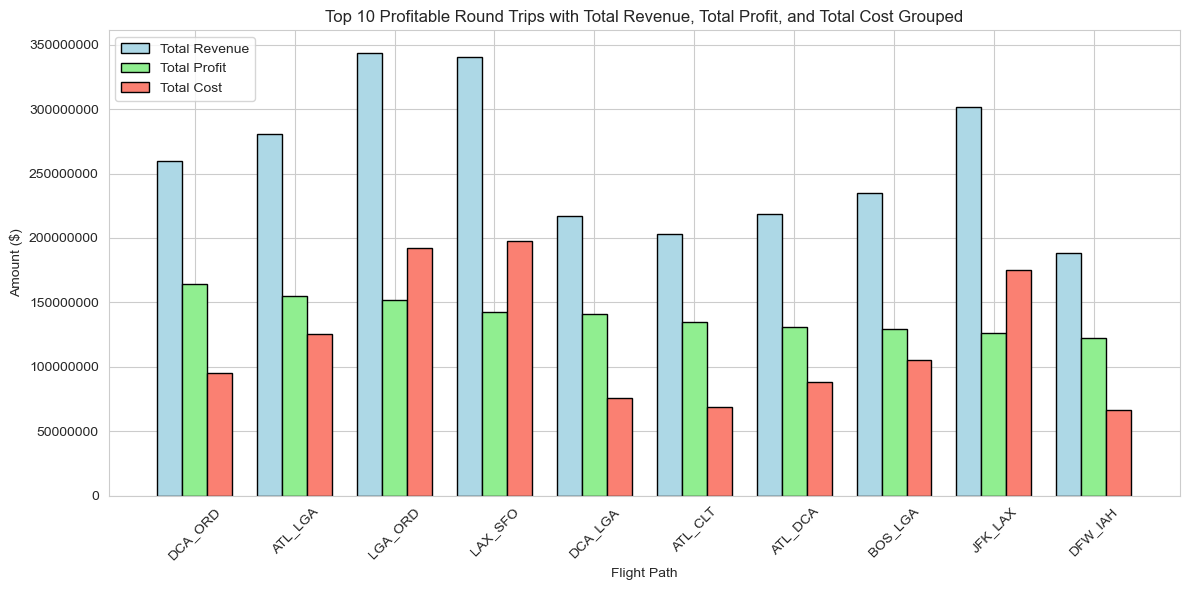

In [68]:
# Setting up the data
flight_paths = top_profitable_routes['Flight_Path']
total_revenue = top_profitable_routes['Total_Revenue']
total_profit = top_profitable_routes['Total_Profit']
total_cost = top_profitable_routes['Total_Cost']

# Defining the width of the bars
bar_width = 0.25

# Setting the positions of the bars on the x-axis
r1 = np.arange(len(flight_paths))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(r1, total_revenue, width=bar_width, label='Total Revenue', color='lightblue', edgecolor='black')
ax.bar(r2, total_profit, width=bar_width, label='Total Profit', color='lightgreen', edgecolor='black')
ax.bar(r3, total_cost, width=bar_width, label='Total Cost', color='salmon', edgecolor='black')

# Formatting
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.xticks([r + bar_width for r in range(len(flight_paths))], flight_paths, rotation=45)
plt.title('Top 10 Profitable Round Trips with Total Revenue, Total Profit, and Total Cost Grouped')
plt.ylabel('Amount ($)')
plt.xlabel('Flight Path')
plt.legend(loc='upper left')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [69]:
top_profitable_routes.head(10)

Flight_Path   Total_Profit  Total_Revenue     Total_Cost  \
1096     DCA_ORD 164,101,597.10 259,434,989.38  95,333,392.28   
174      ATL_LGA 155,286,624.99 280,795,942.59 125,509,317.60   
2128     LGA_ORD 151,796,332.99 343,956,966.03 192,160,633.04   
2087     LAX_SFO 142,849,235.23 340,836,858.17 197,987,622.94   
1080     DCA_LGA 141,081,382.54 216,952,218.50  75,870,835.96   
122      ATL_CLT 134,437,957.99 203,026,334.87  68,588,376.88   
130      ATL_DCA 130,866,045.90 218,848,993.30  87,982,947.40   
527      BOS_LGA 129,525,785.68 234,820,051.36 105,294,265.68   
1948     JFK_LAX 126,523,370.14 302,041,924.64 175,518,554.50   
1267     DFW_IAH 122,226,010.86 188,611,944.62  66,385,933.76   

      Total_Round_Trip_Flights  Total_Passengers_Occupied  Avg_Ticket_Price  \
1096                      3583                 464,304.00            523.76   
174                       4485                 584,148.00            445.69   
2128                      6766                 877,430.00            357.01   
2087                      8009               1,040,274.00            292.64   
1080                      3248                 424,656.00            475.89   
122                       3041                 394,584.00            479.53   
130                       3440                 447,004.00            454.59   
527                       4539                 591,240.00            362.17   
1948                      4049                 528,704.00            536.29   
1267                      2893                 376,898.00            465.43   

      Total_Distance  Total_Mileage_Cost  Total_Airport_Cost  \
1096    2,192,796.00       20,129,867.28            71660000   
174     3,417,570.00       31,373,292.60            89700000   
2128    4,959,478.00       45,528,008.04           135320000   
2087    2,699,033.00       24,777,122.94           160180000   
1080      695,072.00        6,380,760.96            64960000   
122       687,266.00        6,309,101.88            60820000   
130     1,881,680.00       17,273,822.40            68800000   
527       835,176.00        7,666,915.68            90780000   
1948   10,021,275.00       91,995,304.50            80980000   
1267      648,032.00        5,948,933.76            57860000   

      Total_Dep_Delay_Cost  Total_Baggage_Fee_Revenue  \
1096          1,656,300.00              16,250,640.00   
174           2,113,650.00              20,445,180.00   
2128          5,044,275.00              30,710,050.00   
2087          6,025,875.00              36,409,590.00   
1080          1,866,900.00              14,862,960.00   
122             748,875.00              13,810,440.00   
130             879,450.00              15,645,140.00   
527           3,266,700.00              20,693,400.00   
1948          1,489,800.00              18,504,640.00   
1267          1,193,175.00              13,191,430.00   

      Average_Average_Daily_Flights  
1096                           1.39  
174                            1.24  
2128                           1.72  
2087                           2.06  
1080                           2.22  
122                            1.47  
130                            1.27  
527                            2.02  
1948                           1.19  
1267                           1.43

The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter are:
- 1. **Washington, D.C. (DCA) - Chicago, IL (ORD)**
- 2. **Atlanta, GA (ATL) - New York, NY (LGA)**
- 3. **New York, NY (LGA) - Chicago, IL (ORD)**
- 4. **Los Angeles, CA (LAX) - San Francisco, CA (SFO)**
- 5. **Washington, D.C. (DCA) - New York, NY (LGA)**
- 6. **Atlanta, GA (ATL) - Charlotte, NC (CLT)**
- 7. **Atlanta, GA (ATL) - Washington, D.C. (DCA)**
- 8. **Boston, MA (BOS) - New York, NY (LGA)**
- 9. **New York, NY (JFK) - Los Angeles, CA (LAX)**
- 10. **Dallas, TX (DFW) - Houston, TX (IAH)**

## ii) Q3

#### You have been tasked with analyzing 1Q2019 data to identify:
- 3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.

In [70]:
top_profitable_routes.describe()

Total_Profit  Total_Revenue     Total_Cost  Total_Round_Trip_Flights  \
count          10.00          10.00          10.00                     10.00   
mean  139,869,434.34 258,932,622.35 119,063,188.00                  4,405.30   
std    13,680,672.70  56,070,481.79  51,324,577.85                  1,693.33   
min   122,226,010.86 188,611,944.62  66,385,933.76                  2,893.00   
25%   129,860,850.73 217,426,412.20  78,898,863.82                  3,296.00   
50%   137,759,670.26 247,127,520.37 100,313,828.98                  3,816.00   
75%   149,559,558.55 296,730,429.12 163,016,245.28                  4,525.50   
max   164,101,597.10 343,956,966.03 197,987,622.94                  8,009.00   

       Total_Passengers_Occupied  Avg_Ticket_Price  Total_Distance  \
count                      10.00             10.00           10.00   
mean                  572,924.20            439.30    2,803,737.80   
std                   219,450.24             77.95    2,902,096.56   
min                   376,898.00            292.64      648,032.00   
25%                   430,243.00            383.05      730,098.00   
50%                   496,504.00            460.01    2,037,238.00   
75%                   589,467.00            478.62    3,237,935.75   
max                 1,040,274.00            536.29   10,021,275.00   

       Total_Mileage_Cost  Total_Airport_Cost  Total_Dep_Delay_Cost  \
count               10.00               10.00                 10.00   
mean        25,738,313.00       88,106,000.00          2,428,500.00   
std         26,641,246.42       33,866,683.79          1,798,909.07   
min          5,948,933.76       57,860,000.00            748,875.00   
25%          6,702,299.64       65,920,000.00          1,267,331.25   
50%         18,701,844.84       76,320,000.00          1,761,600.00   
75%         29,724,250.18       90,510,000.00          2,978,437.50   
max         91,995,304.50      160,180,000.00          6,025,875.00   

       Total_Baggage_Fee_Revenue  Average_Average_Daily_Flights  
count                      10.00                          10.00  
mean               20,052,347.00                           1.60  
std                 7,680,758.55                           0.38  
min                13,191,430.00                           1.19  
25%                15,058,505.00                           1.30  
50%                17,377,640.00                           1.45  
75%                20,631,345.00                           1.94  
max                36,409,590.00                           2.22

In [71]:
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  ... Airport_Cost Dep_Delay_Cost  \
0  1,025.00            0.97  large_airport  ...        20000           0.00   
1  1,025.00            0.63  large_airport  ...        20000           0.00   
2  1,025.00            0.76  large_airport  ...        20000           0.00   
3  1,025.00            0.36  large_airport  ...        20000           0.00   
4  1,025.00            0.66  large_airport  ...        20000           0.00   

   Arr_Delay_Cost  Total_Delay_Cost  Total_Cost  Ticket_Revenue  \
0            0.00              0.00   29,409.50       56,116.01   
1            0.00              0.00   29,409.50       36,446.48   
2            0.00              0.00   29,409.50       43,967.18   
3            0.00              0.00   29,409.50       20,826.56   
4            0.00              0.00   29,409.50       38,182.02   

   Baggage_Fee_Revenue  Total_Revenue    Profit  Average_Daily_Flights  
0             6,790.00      62,906.01 33,496.51                   1.37  
1             4,410.00      40,856.48 11,446.98                   1.37  
2             5,320.00      49,287.18 19,877.68                   1.37  
3             2,520.00      23,346.56 -6,062.94                   1.37  
4             4,620.00      42,802.02 13,392.52                   1.37  

[5 rows x 25 columns]

In [72]:
Flights_PnL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708018 entries, 0 to 1708017
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   FL_DATE                datetime64[ns]
 1   TAIL_NUM               object        
 2   ORIGIN                 object        
 3   DESTINATION            object        
 4   DEP_DELAY              float64       
 5   ARR_DELAY              float64       
 6   AIR_TIME               float64       
 7   DISTANCE               float64       
 8   OCCUPANCY_RATE         float64       
 9   ORIGIN_TYPE            object        
 10  DESTINATION_TYPE       object        
 11  Flight_Path            object        
 12  PASSENGERS_OCCUPIED    float64       
 13  Avg_Ticket_Price       float64       
 14  Mileage_Cost           float64       
 15  Airport_Cost           int64         
 16  Dep_Delay_Cost         float64       
 17  Arr_Delay_Cost         float64       
 18  Total_Delay_Cost      

### Defining KPI:
- We will use **`On-Time Performance (OTP)`** as our **Northstar KPI metric** because of our steadfast commitment to punctuality. OTP measures the percentage of flights that depart and arrive on schedule, reflecting our dedication to ensuring reliable and timely service

In [73]:
# Defining the conditions for on-time flights
Flights_PnL_df['On_Time'] = (Flights_PnL_df['DEP_DELAY'] <= 0) & (Flights_PnL_df['ARR_DELAY'] <= 0)

# Group by Flight_Path and calculate OTP
otp_by_flight_path = Flights_PnL_df.groupby('Flight_Path')['On_Time'].mean() * 100

# Converting the series to a dataframe to merge
otp_by_flight_path_df = otp_by_flight_path.reset_index()
otp_by_flight_path_df.rename(columns={'On_Time': 'Flight_Path_OTP'}, inplace=True)

# Merging the OTP values back into the original dataframe
Flights_PnL_df = Flights_PnL_df.merge(otp_by_flight_path_df, on='Flight_Path', how='left')

### Defining KPIs:

1. **Available Seat Miles (ASM)**: Calculated as maximum occupancy (200) multiplied by the distance of each flight path, ASM measures the total number of seat miles available for passengers, indicating the airline's capacity to generate revenue.

2. **Cost per Available Seat Mile (CASM)**: Calculated as the total cost divided by ASM, CASM measures the cost efficiency of the airline's operations, reflecting how well costs are managed relative to capacity.

3. **Revenue per Available Seat Mile (RASM)**: Calculated as the total revenue divided by ASM, RASM measures the airline's ability to generate revenue relative to its capacity, indicating the effectiveness of its pricing strategy and demand.

4. **Profit Per Passenger**: Calculated as the profit divided by the number of occupied passengers, this KPI measures the profitability generated from each passenger, reflecting the financial health of passenger operations.rations.

In [74]:
# Calculating Available Seat Miles (ASM) for each flight path
Flights_PnL_df['ASM'] = 200 * Flights_PnL_df['DISTANCE']

# Calculating Cost per Available Seat Mile (CASM)
Flights_PnL_df['CASM'] = Flights_PnL_df['Total_Cost'] / Flights_PnL_df['ASM']

# Calculating Revenue per Available Seat Mile (RASM)
Flights_PnL_df['RASM'] = Flights_PnL_df['Total_Revenue'] / Flights_PnL_df['ASM']

# Calculating Profit Per Passenger
Flights_PnL_df['Profit_Per_Passenger'] = Flights_PnL_df['Profit'] / Flights_PnL_df['PASSENGERS_OCCUPIED']

In [75]:
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  ... Baggage_Fee_Revenue  \
0  1,025.00            0.97  large_airport  ...            6,790.00   
1  1,025.00            0.63  large_airport  ...            4,410.00   
2  1,025.00            0.76  large_airport  ...            5,320.00   
3  1,025.00            0.36  large_airport  ...            2,520.00   
4  1,025.00            0.66  large_airport  ...            4,620.00   

  Total_Revenue    Profit  Average_Daily_Flights  On_Time  Flight_Path_OTP  \
0     62,906.01 33,496.51                   1.37     True            56.80   
1     40,856.48 11,446.98                   1.37     True            56.80   
2     49,287.18 19,877.68                   1.37     True            56.80   
3     23,346.56 -6,062.94                   1.37    False            56.80   
4     42,802.02 13,392.52                   1.37     True            56.80   

         ASM  CASM  RASM  Profit_Per_Passenger  
0 205,000.00  0.14  0.31                172.66  
1 205,000.00  0.14  0.20                 90.85  
2 205,000.00  0.14  0.24                130.77  
3 205,000.00  0.14  0.11                -84.21  
4 205,000.00  0.14  0.21                101.46  

[5 rows x 31 columns]

In [76]:
Flights_PnL_df.head()

FL_DATE TAIL_NUM ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  AIR_TIME  \
0 2019-03-02   N955WN    RSW         CLE      -8.00      -6.00    143.00   
1 2019-03-09   N754SW    RSW         CLE      -7.00     -22.00    137.00   
2 2019-03-24   N14249    CLE         RSW     -10.00     -23.00    136.00   
3 2019-03-11   N14240    RSW         CLE      -1.00       8.00    138.00   
4 2019-03-11   N14240    CLE         RSW      -4.00     -23.00    130.00   

   DISTANCE  OCCUPANCY_RATE    ORIGIN_TYPE  ... Baggage_Fee_Revenue  \
0  1,025.00            0.97  large_airport  ...            6,790.00   
1  1,025.00            0.63  large_airport  ...            4,410.00   
2  1,025.00            0.76  large_airport  ...            5,320.00   
3  1,025.00            0.36  large_airport  ...            2,520.00   
4  1,025.00            0.66  large_airport  ...            4,620.00   

  Total_Revenue    Profit  Average_Daily_Flights  On_Time  Flight_Path_OTP  \
0     62,906.01 33,496.51                   1.37     True            56.80   
1     40,856.48 11,446.98                   1.37     True            56.80   
2     49,287.18 19,877.68                   1.37     True            56.80   
3     23,346.56 -6,062.94                   1.37    False            56.80   
4     42,802.02 13,392.52                   1.37     True            56.80   

         ASM  CASM  RASM  Profit_Per_Passenger  
0 205,000.00  0.14  0.31                172.66  
1 205,000.00  0.14  0.20                 90.85  
2 205,000.00  0.14  0.24                130.77  
3 205,000.00  0.14  0.11                -84.21  
4 205,000.00  0.14  0.21                101.46  

[5 rows x 31 columns]

In [77]:
Flights_PnL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708018 entries, 0 to 1708017
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   FL_DATE                datetime64[ns]
 1   TAIL_NUM               object        
 2   ORIGIN                 object        
 3   DESTINATION            object        
 4   DEP_DELAY              float64       
 5   ARR_DELAY              float64       
 6   AIR_TIME               float64       
 7   DISTANCE               float64       
 8   OCCUPANCY_RATE         float64       
 9   ORIGIN_TYPE            object        
 10  DESTINATION_TYPE       object        
 11  Flight_Path            object        
 12  PASSENGERS_OCCUPIED    float64       
 13  Avg_Ticket_Price       float64       
 14  Mileage_Cost           float64       
 15  Airport_Cost           int64         
 16  Dep_Delay_Cost         float64       
 17  Arr_Delay_Cost         float64       
 18  Total_Delay_Cost      

In [78]:
route_summary = Flights_PnL_df.groupby('Flight_Path').agg(
    Total_Revenue=('Total_Revenue', 'sum'),
    Total_Cost=('Total_Cost', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Round_Trip_Flights =('Flight_Path', 'count'),
    Total_Passengers_Occupied=('PASSENGERS_OCCUPIED', 'sum'),
    Average_Ticket_Price=('Avg_Ticket_Price','mean'),
    Total_Distance=('DISTANCE','sum'),
    Total_Mileage_Cost=('Mileage_Cost','sum'),
    Total_Airport_Cost=('Airport_Cost','sum'),
    Total_Dep_Delay_Cost=('Dep_Delay_Cost','sum'),
    Total_Baggage_Fee_Revenue=('Baggage_Fee_Revenue','sum'),
    Average_Flight_Path_OTP=('Flight_Path_OTP','mean'),
    Average_Daily_Flights=('Average_Daily_Flights','mean'),
    Average_ASM=('ASM','mean'),
    Average_CASM=('CASM','mean'),
    Average_RASM=('RASM','mean'),
    Average_Occupancy_Rate=('OCCUPANCY_RATE','mean'),
    Average_Profit_Per_Passenger=('Profit_Per_Passenger','mean')
).reset_index()

Summary_Table = route_summary.sort_values(by='Total_Profit', ascending=False)

In [79]:
Summary_Table.head()

Flight_Path  Total_Revenue     Total_Cost   Total_Profit  \
1096     DCA_ORD 259,434,989.38  95,333,392.28 164,101,597.10   
174      ATL_LGA 280,795,942.59 125,509,317.60 155,286,624.99   
2128     LGA_ORD 343,956,966.03 192,160,633.04 151,796,332.99   
2087     LAX_SFO 340,836,858.17 197,987,622.94 142,849,235.23   
1080     DCA_LGA 216,952,218.50  75,870,835.96 141,081,382.54   

      Total_Round_Trip_Flights  Total_Passengers_Occupied  \
1096                      3583                 464,304.00   
174                       4485                 584,148.00   
2128                      6766                 877,430.00   
2087                      8009               1,040,274.00   
1080                      3248                 424,656.00   

      Average_Ticket_Price  Total_Distance  Total_Mileage_Cost  \
1096                523.76    2,192,796.00       20,129,867.28   
174                 445.69    3,417,570.00       31,373,292.60   
2128                357.01    4,959,478.00       45,528,008.04   
2087                292.64    2,699,033.00       24,777,122.94   
1080                475.89      695,072.00        6,380,760.96   

      Total_Airport_Cost  Total_Dep_Delay_Cost  Total_Baggage_Fee_Revenue  \
1096            71660000          1,656,300.00              16,250,640.00   
174             89700000          2,113,650.00              20,445,180.00   
2128           135320000          5,044,275.00              30,710,050.00   
2087           160180000          6,025,875.00              36,409,590.00   
1080            64960000          1,866,900.00              14,862,960.00   

      Average_Flight_Path_OTP  Average_Daily_Flights  Average_ASM  \
1096                    60.20                   1.39   122,400.00   
174                     51.62                   1.24   152,400.00   
2128                    46.82                   1.72   146,600.00   
2087                    51.23                   2.06    67,400.00   
1080                    54.19                   2.22    42,800.00   

      Average_CASM  Average_RASM  Average_Occupancy_Rate  \
1096          0.22          0.59                    0.65   
174           0.18          0.41                    0.65   
2128          0.19          0.35                    0.65   
2087          0.37          0.63                    0.65   
1080          0.55          1.56                    0.65   

      Average_Profit_Per_Passenger  
1096                        328.89  
174                         240.38  
2128                        147.31  
2087                        114.82  
1080                        311.40

### Defining the KPI:
`Breakeven_Round_Trips` : Indicates the number of round-trip flights needed to recover the $90 million airplane cost for each route. This metric helps us understand how quickly each route can cover the initial investment and start generating profit, highlighting the most efficient routes for capital recovery.

In [80]:
# Assuming the upfront airplane cost
airplane_cost = 90000000  # $90 million

# Calculate breakeven round trips for each route
Summary_Table['Breakeven_Round_Trips'] = airplane_cost / Summary_Table['Total_Profit'] * Summary_Table['Total_Round_Trip_Flights']

# Sort routes by Breakeven_Round_Trips in ascending order
Summary_Table_Sorted = Summary_Table.sort_values(by='Total_Profit', ascending=False)

Summary_Table_Sorted.head()

Flight_Path  Total_Revenue     Total_Cost   Total_Profit  \
1096     DCA_ORD 259,434,989.38  95,333,392.28 164,101,597.10   
174      ATL_LGA 280,795,942.59 125,509,317.60 155,286,624.99   
2128     LGA_ORD 343,956,966.03 192,160,633.04 151,796,332.99   
2087     LAX_SFO 340,836,858.17 197,987,622.94 142,849,235.23   
1080     DCA_LGA 216,952,218.50  75,870,835.96 141,081,382.54   

      Total_Round_Trip_Flights  Total_Passengers_Occupied  \
1096                      3583                 464,304.00   
174                       4485                 584,148.00   
2128                      6766                 877,430.00   
2087                      8009               1,040,274.00   
1080                      3248                 424,656.00   

      Average_Ticket_Price  Total_Distance  Total_Mileage_Cost  \
1096                523.76    2,192,796.00       20,129,867.28   
174                 445.69    3,417,570.00       31,373,292.60   
2128                357.01    4,959,478.00       45,528,008.04   
2087                292.64    2,699,033.00       24,777,122.94   
1080                475.89      695,072.00        6,380,760.96   

      Total_Airport_Cost  Total_Dep_Delay_Cost  Total_Baggage_Fee_Revenue  \
1096            71660000          1,656,300.00              16,250,640.00   
174             89700000          2,113,650.00              20,445,180.00   
2128           135320000          5,044,275.00              30,710,050.00   
2087           160180000          6,025,875.00              36,409,590.00   
1080            64960000          1,866,900.00              14,862,960.00   

      Average_Flight_Path_OTP  Average_Daily_Flights  Average_ASM  \
1096                    60.20                   1.39   122,400.00   
174                     51.62                   1.24   152,400.00   
2128                    46.82                   1.72   146,600.00   
2087                    51.23                   2.06    67,400.00   
1080                    54.19                   2.22    42,800.00   

      Average_CASM  Average_RASM  Average_Occupancy_Rate  \
1096          0.22          0.59                    0.65   
174           0.18          0.41                    0.65   
2128          0.19          0.35                    0.65   
2087          0.37          0.63                    0.65   
1080          0.55          1.56                    0.65   

      Average_Profit_Per_Passenger  Breakeven_Round_Trips  
1096                        328.89               1,965.06  
174                         240.38               2,599.39  
2128                        147.31               4,011.56  
2087                        114.82               5,045.95  
1080                        311.40               2,072.00

In [81]:
Summary_Table_Sorted.describe()

Total_Revenue     Total_Cost   Total_Profit  Total_Round_Trip_Flights  \
count       2,734.00       2,734.00       2,734.00                  2,734.00   
mean   37,341,838.13  16,762,039.28  20,579,798.85                    624.73   
std    40,000,112.94  19,309,060.72  22,213,210.33                    701.34   
min        42,288.00      19,030.20  -2,293,305.80                      1.00   
25%     9,383,030.30   4,544,280.13   4,595,480.24                    165.00   
50%    25,456,953.81  10,703,802.36  13,590,470.43                    420.00   
75%    50,533,284.80  21,523,836.70  28,510,100.86                    814.75   
max   343,956,966.03 197,987,622.94 164,101,597.10                  8,009.00   

       Total_Passengers_Occupied  Average_Ticket_Price  Total_Distance  \
count                   2,734.00              2,734.00        2,734.00   
mean                   81,243.31                419.37      464,047.14   
std                    91,173.93                123.28      632,467.12   
min                        84.00                 11.00          390.00   
25%                    21,476.00                346.27      110,764.50   
50%                    54,153.00                418.18      254,023.00   
75%                   105,501.00                501.37      547,682.75   
max                 1,040,274.00                875.18   10,021,275.00   

       Total_Mileage_Cost  Total_Airport_Cost  Total_Dep_Delay_Cost  \
count            2,734.00            2,734.00              2,734.00   
mean         4,259,952.72       11,965,234.09            264,310.56   
std          5,806,048.17       14,046,104.04            352,476.24   
min              3,580.20           15,000.00                  0.00   
25%          1,016,818.11        2,840,000.00             59,625.00   
50%          2,331,931.14        7,425,000.00            156,862.50   
75%          5,027,727.64       15,530,000.00            338,006.25   
max         91,995,304.50      160,180,000.00          6,025,875.00   

       Total_Baggage_Fee_Revenue  Average_Flight_Path_OTP  \
count                   2,734.00                 2,734.00   
mean                2,843,515.68                    55.79   
std                 3,191,087.43                    11.46   
min                     2,940.00                     0.00   
25%                   751,660.00                    49.65   
50%                 1,895,355.00                    56.16   
75%                 3,692,535.00                    63.26   
max                36,409,590.00                   100.00   

       Average_Daily_Flights  Average_ASM  Average_CASM  Average_RASM  \
count               2,734.00     2,734.00      2,734.00      2,734.00   
mean                    1.42   171,093.66          0.22          0.53   
std                     0.33   107,658.25          0.14          0.46   
min                     1.00    20,400.00          0.08          0.08   
25%                     1.12    89,050.00          0.13          0.24   
50%                     1.39   148,900.00          0.18          0.38   
75%                     1.67   224,200.00          0.26          0.65   
max                     3.19   499,200.00          1.02          3.76   

       Average_Occupancy_Rate  Average_Profit_Per_Passenger  \
count                2,734.00                      2,734.00   
mean                     0.65                        221.66   
std                      0.02                        119.15   
min                      0.42                       -130.82   
25%                      0.64                        144.54   
50%                      0.65                        212.52   
75%                      0.66                        299.54   
max                      0.95                        683.00   

       Breakeven_Round_Trips  
count               2,734.00  
mean              -21,588.36  
std             1,570,416.45  
min           -81,753,554.50  
25%                 2,079.02  
50%              

In [82]:
filtered_routes = Summary_Table[
    (Summary_Table['Average_Flight_Path_OTP'] < 63.26) & # Below 75th percentile for better OTP potential
    (Summary_Table['Average_ASM'] > 89050.00) & # Above 25th percentile for ASM
    (Summary_Table['Average_RASM'] > 0.24) & # Above 25th percentile for RASM
    (Summary_Table['Average_Occupancy_Rate'] > 0.64) & # Above 25th percentile for Occupancy Rate
    (Summary_Table['Average_Profit_Per_Passenger'] > 144.54) & # Above 25th percentile for Profit per Passenger
    (Summary_Table['Breakeven_Round_Trips'] < 3931.70) # Below 75th percentile for Breakeven Round Trips
]
Recommended_Paths = filtered_routes.sort_values(by='Total_Profit', ascending=False)

### Filtering Criteria Explanation for Market Entry into Domestic Routes
To align with our company’s motto, “On time, for you,” we have meticulously selected routes based on key performance indicators (KPIs) that emphasize punctuality and profitability. Below is the rationale behind our filtering criteria, which aim to identify the top 5 domestic routes for market entry:

1. #### Average Flight Path OTP < 63.26:
We prioritize routes where the average On-Time Performance (OTP) is below the 75th percentile of competitors. This indicates that these routes have room for improvement in punctuality. By focusing on these routes, we can leverage our commitment to timely service to gain a competitive advantage.

2. #### Average ASM > 89,050.00:
Routes with an Average Seat Miles (ASM) above the 25th percentile of competitors are targeted. This ensures that we are selecting routes with substantial seating capacity and significant distances traveled, both of which are crucial for maximizing revenue potential.

3. #### Average RASM > 0.24:
We filter for routes where the Average Revenue per Available Seat Mile (RASM) exceeds the 25th percentile of competitors. High RASM values indicate efficient revenue generation from available seat miles, making these routes financially attractive.

4. #### Average Occupancy Rate > 0.64:
Routes with an Average Occupancy Rate above the 25th percentile of competitors are preferred. Higher occupancy rates reflect better utilization of available seats, directly contributing to increased profitability and resource efficiency.

5. #### Average Profit Per Passenger > 144.54:
We select routes where the Average Profit per Passenger is above the 25th percentile of competitors. This criterion ensures that we are focusing on routes that are not only profitable but also generate high profit margins per passenger, making them more lucrative.

6. #### Breakeven Round Trips < 3931.70:
By choosing routes with breakeven round trips below the 75th percentile, we ensure that fewer flights are required to cover costs. This minimizes financial risk and supports a more sustainable operational model.

### Conclusion:
By applying these rigorous criteria, we ensure that our selected routes align with our brand promise of punctuality and profitability. These metrics help us identify routes where we can deliver superior on-time performance, capitalize on high revenue potential, and maintain efficient and profitable operations. This strategic approach positions us well for successful market entry and sustained competitive advantage in the domestic airline market.

In [83]:
# Displaying Recommended Routes
print( 'Summary of recommended routes:')
Recommended_Paths[['Flight_Path', 'Total_Profit','Average_Flight_Path_OTP','Average_Daily_Flights','Average_ASM','Average_CASM','Average_RASM','Average_Occupancy_Rate','Average_Profit_Per_Passenger']].head(5)

Summary of recommended routes:


Flight_Path   Total_Profit  Average_Flight_Path_OTP  \
1096     DCA_ORD 164,101,597.10                    60.20   
174      ATL_LGA 155,286,624.99                    51.62   
130      ATL_DCA 130,866,045.90                    58.84   
1309     DFW_ORD 118,221,449.86                    48.62   
132      ATL_DFW 107,836,823.55                    53.68   

      Average_Daily_Flights  Average_ASM  Average_CASM  Average_RASM  \
1096                   1.39   122,400.00          0.22          0.59   
174                    1.24   152,400.00          0.18          0.41   
130                    1.27   109,400.00          0.23          0.58   
1309                   1.13   160,203.87          0.18          0.41   
132                    1.50   146,200.00          0.19          0.42   

      Average_Occupancy_Rate  Average_Profit_Per_Passenger  
1096                    0.65                        328.89  
174                     0.65                        240.38  
130                     0.65                        269.42  
1309                    0.66                        259.30  
132                     0.65                        232.64

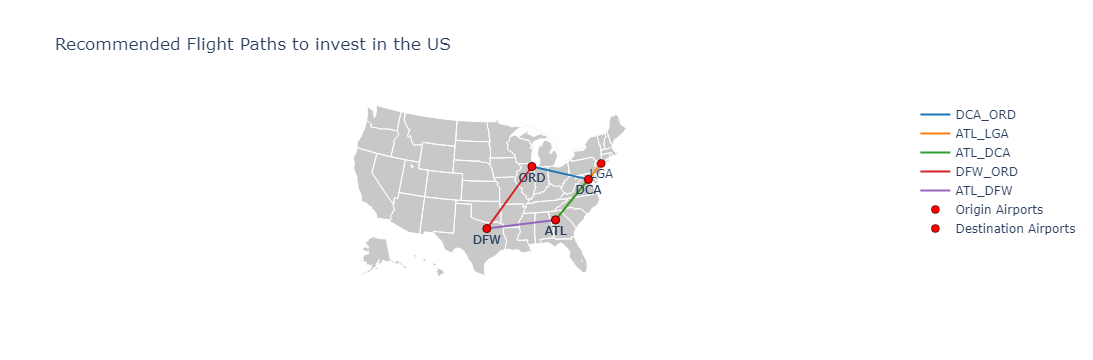

In [84]:
# Recommended flight paths with origin and destination
recommended_paths = ['DCA_ORD', 'ATL_LGA', 'ATL_DCA', 'DFW_ORD', 'ATL_DFW']
Recommended_Routes = pd.DataFrame({
    'Flight_Path': recommended_paths,
    'ORIGIN': ['DCA', 'ATL', 'ATL', 'DFW', 'ATL'],
    'DESTINATION': ['ORD', 'LGA', 'DCA', 'ORD', 'DFW']
})

# Merge with Airport_Codes_df to get latitude and longitude for origin and destination
Rec_df = Recommended_Routes.merge(Airport_Codes_df,
                                  left_on='ORIGIN', right_on='IATA_CODE', how='left')
Rec_df.rename(columns={'COORDINATES': 'Origin_Coordinates'}, inplace=True)
Rec_df = Rec_df.merge(Airport_Codes_df,
                      left_on='DESTINATION', right_on='IATA_CODE', how='left')
Rec_df.rename(columns={'COORDINATES': 'Destination_Coordinates'}, inplace=True)

# Split coordinates into latitude and longitude for origin
Rec_df[['Origin_Longitude', 'Origin_Latitude']] = Rec_df['Origin_Coordinates'].str.split(', ', expand=True).astype(float)

# Split coordinates into latitude and longitude for destination
Rec_df[['Destination_Longitude', 'Destination_Latitude']] = Rec_df['Destination_Coordinates'].str.split(', ', expand=True).astype(float)

# Create the figure
fig = go.Figure()

# Define colors for each flight path
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']

# Plot each flight path as a line with different colors
for i, row in Rec_df.iterrows():
    fig.add_trace(
        go.Scattergeo(
            locationmode='USA-states',
            lon=[row['Origin_Longitude'], row['Destination_Longitude']],
            lat=[row['Origin_Latitude'], row['Destination_Latitude']],
            mode='lines',
            line=dict(width=2, color=colors[i]),
            hoverinfo='none',
            name=row['Flight_Path']  # Set the name attribute for legend
        )
    )

# Plot origin and destination airports as markers with labels
fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        lon=Rec_df['Origin_Longitude'],
        lat=Rec_df['Origin_Latitude'],
        text=Rec_df['ORIGIN'],
        mode='markers+text',  # Include text labels on markers
        textposition='bottom center',  # Position of the airport label
        marker=dict(size=8, color='rgb(255, 0, 0)', line=dict(width=1, color='rgba(0, 0, 0, 0.5)')),
        name='Origin Airports'
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        lon=Rec_df['Destination_Longitude'],
        lat=Rec_df['Destination_Latitude'],
        text=Rec_df['DESTINATION'],
        mode='markers+text',  # Include text labels on markers
        textposition='bottom center',  # Position of the airport label
        marker=dict(size=8, color='rgb(255, 0, 0)', line=dict(width=1, color='rgba(0, 0, 0, 0.5)')),
        name='Destination Airports'
    )
)

# Update layout
fig.update_layout(
    title='Recommended Flight Paths to invest in the US',
    geo=dict(
        scope='north america',
        showland=True,
        landcolor='rgb(200, 200, 200)',  # Adjusted to a slightly darker shade
        countrycolor='rgb(204, 204, 204)',
        projection_type='albers usa'
    )
)

fig.show()

The recommended round trip routes:
- 1. **Washington, D.C. (DCA) - Chicago, IL (ORD)**
- 2. **Atlanta, GA (ATL) - New York, NY (LGA)**
- 3. **Atlanta, GA (ATL) - Washington, D.C. (DCA)**
- 4. **Dallas/Fort Worth, TX (DFW) - Chicago, IL (ORD)**
- 5. **Atlanta, GA (ATL) - Dallas/Fort Worth, TX (DFW)**

## ii) Q4

#### You have been tasked with analyzing 1Q2019 data to identify:
- 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for 
each of the 5 round trip routes that you recommend. Print key summary components fo 
these routes.

In [85]:
# Displaying Recommended Routes
Recommended_Paths.head()

Flight_Path  Total_Revenue     Total_Cost   Total_Profit  \
1096     DCA_ORD 259,434,989.38  95,333,392.28 164,101,597.10   
174      ATL_LGA 280,795,942.59 125,509,317.60 155,286,624.99   
130      ATL_DCA 218,848,993.30  87,982,947.40 130,866,045.90   
1309     DFW_ORD 207,993,911.38  89,772,461.52 118,221,449.86   
132      ATL_DFW 195,661,018.03  87,824,194.48 107,836,823.55   

      Total_Round_Trip_Flights  Total_Passengers_Occupied  \
1096                      3583                 464,304.00   
174                       4485                 584,148.00   
130                       3440                 447,004.00   
1309                      3153                 414,808.00   
132                       3206                 418,232.00   

      Average_Ticket_Price  Total_Distance  Total_Mileage_Cost  \
1096                523.76    2,192,796.00       20,129,867.28   
174                 445.69    3,417,570.00       31,373,292.60   
130                 454.59    1,881,680.00       17,273,822.40   
1309                466.42    2,525,614.00       23,185,136.52   
132                 432.83    2,343,586.00       21,514,119.48   

      Total_Airport_Cost  Total_Dep_Delay_Cost  Total_Baggage_Fee_Revenue  \
1096            71660000          1,656,300.00              16,250,640.00   
174             89700000          2,113,650.00              20,445,180.00   
130             68800000            879,450.00              15,645,140.00   
1309            63060000          1,648,575.00              14,518,280.00   
132             64120000          1,012,575.00              14,638,120.00   

      Average_Flight_Path_OTP  Average_Daily_Flights  Average_ASM  \
1096                    60.20                   1.39   122,400.00   
174                     51.62                   1.24   152,400.00   
130                     58.84                   1.27   109,400.00   
1309                    48.62                   1.13   160,203.87   
132                     53.68                   1.50   146,200.00   

      Average_CASM  Average_RASM  Average_Occupancy_Rate  \
1096          0.22          0.59                    0.65   
174           0.18          0.41                    0.65   
130           0.23          0.58                    0.65   
1309          0.18          0.41                    0.66   
132           0.19          0.42                    0.65   

      Average_Profit_Per_Passenger  Breakeven_Round_Trips  
1096                        328.89               1,965.06  
174                         240.38               2,599.39  
130                         269.42               2,365.78  
1309                        259.30               2,400.33  
132                         232.64               2,675.71

In [86]:
Recommended_Paths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 1096 to 1655
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flight_Path                   761 non-null    object 
 1   Total_Revenue                 761 non-null    float64
 2   Total_Cost                    761 non-null    float64
 3   Total_Profit                  761 non-null    float64
 4   Total_Round_Trip_Flights      761 non-null    int64  
 5   Total_Passengers_Occupied     761 non-null    float64
 6   Average_Ticket_Price          761 non-null    float64
 7   Total_Distance                761 non-null    float64
 8   Total_Mileage_Cost            761 non-null    float64
 9   Total_Airport_Cost            761 non-null    int64  
 10  Total_Dep_Delay_Cost          761 non-null    float64
 11  Total_Baggage_Fee_Revenue     761 non-null    float64
 12  Average_Flight_Path_OTP       761 non-null    float64
 13  Averag

In [87]:
Recommended_Paths_Filtered_df = Recommended_Paths[['Flight_Path','Breakeven_Round_Trips','Average_Daily_Flights','Total_Cost', 'Total_Revenue', 'Total_Profit', 'Total_Passengers_Occupied', 'Average_Ticket_Price']].head(5)

### Defining the KPI:
 **Break-Even Point (BEP in Days)** in days: This is the number of days needed to reach the break-even point. It is calculated as:

In [88]:
#Calculating Break-Even Point (BEP) in days
Recommended_Paths_Filtered_df['BEP_in_Days'] = Recommended_Paths_Filtered_df['Breakeven_Round_Trips'] / Recommended_Paths_Filtered_df['Average_Daily_Flights']

# Display the dataframe with calculated values
Recommended_Paths_Filtered_df.head()

Flight_Path  Breakeven_Round_Trips  Average_Daily_Flights     Total_Cost  \
1096     DCA_ORD               1,965.06                   1.39  95,333,392.28   
174      ATL_LGA               2,599.39                   1.24 125,509,317.60   
130      ATL_DCA               2,365.78                   1.27  87,982,947.40   
1309     DFW_ORD               2,400.33                   1.13  89,772,461.52   
132      ATL_DFW               2,675.71                   1.50  87,824,194.48   

      Total_Revenue   Total_Profit  Total_Passengers_Occupied  \
1096 259,434,989.38 164,101,597.10                 464,304.00   
174  280,795,942.59 155,286,624.99                 584,148.00   
130  218,848,993.30 130,866,045.90                 447,004.00   
1309 207,993,911.38 118,221,449.86                 414,808.00   
132  195,661,018.03 107,836,823.55                 418,232.00   

      Average_Ticket_Price  BEP_in_Days  
1096                523.76     1,412.29  
174                 445.69     2,096.57  
130                 454.59     1,866.82  
1309                466.42     2,133.35  
132                 432.83     1,779.18

In [89]:
Recommended_Paths_Filtered_df.describe()

Breakeven_Round_Trips  Average_Daily_Flights     Total_Cost  \
count                   5.00                   5.00           5.00   
mean                2,401.25                   1.31  97,284,462.66   
std                   276.63                   0.15  16,069,335.19   
min                 1,965.06                   1.13  87,824,194.48   
25%                 2,365.78                   1.24  87,982,947.40   
50%                 2,400.33                   1.27  89,772,461.52   
75%                 2,599.39                   1.39  95,333,392.28   
max                 2,675.71                   1.50 125,509,317.60   

       Total_Revenue   Total_Profit  Total_Passengers_Occupied  \
count           5.00           5.00                       5.00   
mean  232,546,970.94 135,262,508.28                 465,699.20   
std    36,062,409.96  23,950,746.49                  69,326.45   
min   195,661,018.03 107,836,823.55                 414,808.00   
25%   207,993,911.38 118,221,449.86                 418,232.00   
50%   218,848,993.30 130,866,045.90                 447,004.00   
75%   259,434,989.38 155,286,624.99                 464,304.00   
max   280,795,942.59 164,101,597.10                 584,148.00   

       Average_Ticket_Price  BEP_in_Days  
count                  5.00         5.00  
mean                 464.66     1,857.64  
std                   35.25       290.55  
min                  432.83     1,412.29  
25%                  445.69     1,779.18  
50%                  454.59     1,866.82  
75%                  466.42     2,096.57  
max                  523.76     2,133.35

- The `Breakeven_Round_Trips` column shows the number of round-trip flights needed to recover the initial airplane cost for each route, with a breakeven period (`BEP_in_Days`) ranging from 1,412 to 2,133 days.
- With this data, we can recover our capital in approximately **3 years and 10 months to 5 years and 10 months**, after which we will start generating profit.

## ii) Q5

#### You have been tasked with analyzing 1Q2019 data to identify:
- 5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

#### Current KPIs:
- **Primary KPIs** that we are tracking currently:
    1. **Profit**: Net income from airline operations after deducting all operational variable costs.
    2. **On-Time Performance (OTP)**: Percentage of flights that depart and arrive on time.
    3. **Break-Even Point (BEP in Days)**: Number of days required to reach the breakeven point in terms of flights operated.
- **Secondary KPIs** that we are tracking currently: 
    1. **Total Revenue**: Total income generated from ticket sales and additional services.
    2. **Total Cost**: Total expenses incurred in operating flights, including fuel, maintenance, and crew costs.
    3. **Average Daily Flights**: Average number of flights operated per day on specific routes.
    4. **Available Seat Miles (ASM)**: Total number of seat miles available for passengers.
    5. **Cost per Available Seat Mile (CASM)**: Cost incurred per seat mile available for passengers.
    6. **Revenue per Available Seat Mile (RASM)**: Revenue generated per seat mile available for passengers.
    7. **Profit Per Passenger**: Profit earned per passenger after deducting costs associated with their travel.
    8. **Breakeven Round Trips**: Number of round trip flights required to cover the upfront airplane cost.

#### Recommended Future KPIs:
- Recommended **Primary KPIs** that we should track:
    1. **Aircraft Utilization**: Percentage of time an aircraft is generating revenue to the company. [*Operational Metric*]
    2. **Operational Reliability**: Percentage of flights that operate as scheduled without cancellations or significant delays. [*Operational Metric*]
    3. **Customer Satisfaction Score**: Measure of passenger satisfaction through surveys. [*Customer Centric Metric*]
    4. **Customer Retention Rate**: Percentage of customers who book again after their initial flight. [*Customer Centric Metric*]
- Recommended **Secondary KPIs** that we should track:
    1. **Market Share**: Percentage of total available seat miles or passengers served compared to competitors on specific routes. [*Competitive Metric*]
    2. **Baggage Handling Efficiency**: Percentage of mishandled baggage incidents. [*Operational Metric*]
    3. **Customer Loyalty Index**: Measurement of customer loyalty and repeat bookings. [*Customer Centric Metric*]
    4. **Route Profitability**: Profitability of each specific flight route based on revenue and costs. [*Revenue Metric*]
    5. **Environmental Impact**: Measurement of the airline's environmental footprint, including emissions per passenger or per flight. [*Social Metric*]

#### Conclusion
These KPIs will serve as critical benchmarks to guide our strategic decisions and ensure operational excellence as we enter the US domestic market. They are consistent with our core value of punctuality and our commitment to providing exceptional service under our guiding principle of 'On time, for you'. These metrics measure not only financial health and operational efficiency, but also customer satisfaction and competitive positioning.

##### - Submitted by 

Subhash Anagalabylu Ramachandra